# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [240]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [241]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [242]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
churn = pd.read_csv("/content/drive/MyDrive/Advanced ML/Project - Credit card churn prediction/BankChurners.csv")

Make a copy of the original data set

In [245]:
data = churn.copy()

## Data Overview

 Shape of the data set





In [246]:
data.shape

(10127, 21)

 Observation : Data has 10127 rows and 21 columns

### First 5 rows

In [247]:
#print first 5 rows
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


### Last 5 rows

In [248]:
#last 5 rows
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Check the data types

In [249]:
# Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Observations


*   6 columns have string - Object data type values
*   All other parameters are numerical values
*   Education_Level  and  Marital_Status have some missing values






### Check for Duplicate rows

In [250]:
# checking for duplicate values
data.duplicated().sum()

0

No duplicated *rows*

### Check for Statistical Summary

In [251]:
#statisctical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


Observations:


*   Customer age varies from 26 to 73 years
*   Number of dependents vary from 0 to 5 with mean value of 2 depenedents
*   Months_on_book: Period of relationship with the bank (in months) vary from 13 to 56 months. Average number of customers have 36 months relations with bank
*   Total_Relationship_Count: Total no. of products held by the customer -vary from 1 to 6. 50% of customers have more than 4 products
*   Months_Inactive_12_mon: No. of months inactive in the last 12 months - vary from 0 to 6 months. 50% of the customers are inactive for more than 2 months
*   Contacts_Count_12_mon: No. of Contacts in the last 12 months -  vary from 0 to 6 months. 50% of the customers not contacted for more than 2 months
*   Credit_Limit: Credit Limit on the Credit Card - vary from 1438.30 to 34516.00. Average credit limit is 8631.95 while Median (50%) is 4549.00 which indicates the data is right skewed. There could be outliers.
*   Total Revolving Balance on the Credit Card vary from 0 to $ 2517.00

*   Avg_Open_To_Buy: Open to Buy Credit Line vary from 0 to $ 34516. 50% of customers have credit below 3474.000 while average value is 7469.140 which indicates data is right skewed with probable outliers
*   Total_Amt_Chng_Q4_Q1: Change in Transaction Amount - vary from 0 to 3.397. 75% of data is below 0.859, which indicates there are outliers and right skewness

*   Total_Trans_Amt Total Transaction Amount (Last 12 months) vary from 510 to 18484.000. 75% of data is below 4741.000 which indicate outliers
*   Total_Trans_Ct: Total Transaction Count vary from 10 to 139 in an year.

*   Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) vary from 0 to 3.714
*   Avg_Utilization_Ratio: Average Card Utilization Ratio vary from 0 to 0.999. 75% of data is below 0.503. Outliers and right skewness is evident.
















In [252]:
#Statistical summary for String data
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


Observations


*   More customers are existing customers
*   More than 50% of customers are female
*   Graduate Customers are more in number not counting the missing values
*   Married customers are higher in number not counting the missing values
*   More customers are in the income category less than $40K
*   Most customers have Blue category card







### Print the unique values of Object data types

In [253]:
#print unique value counts for object data type parameters
obj_col = data.select_dtypes(include="object").columns
for col in obj_col:
    print(f"{col} : {data[col].value_counts()}")
    print ('*'*50)

Attrition_Flag : Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Gender : Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Education_Level : Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Marital_Status : Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Income_Category : Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
**************************************************
Card_Category : Card_Category
Blue        9436
Silver       555
Gold      

Drop the CLIENTNUM column since it doenst add any value

In [254]:
#drop clinetnum column
data.drop("CLIENTNUM", axis=1, inplace=True)

Replace the Target variable values for Attrition flag with Exisiting Customer = 0 and Attrited Customer = 1

In [255]:
# replace attrition flag values to numerical value
data["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1}, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



The below functions need to be defined to carry out the Exploratory Data Analysis.

In [256]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [257]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [258]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [259]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [260]:
#Define function to plot with Percentage

def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

## Univariate analysis

Lets check the Distribution of the features

### `Customer_Age`

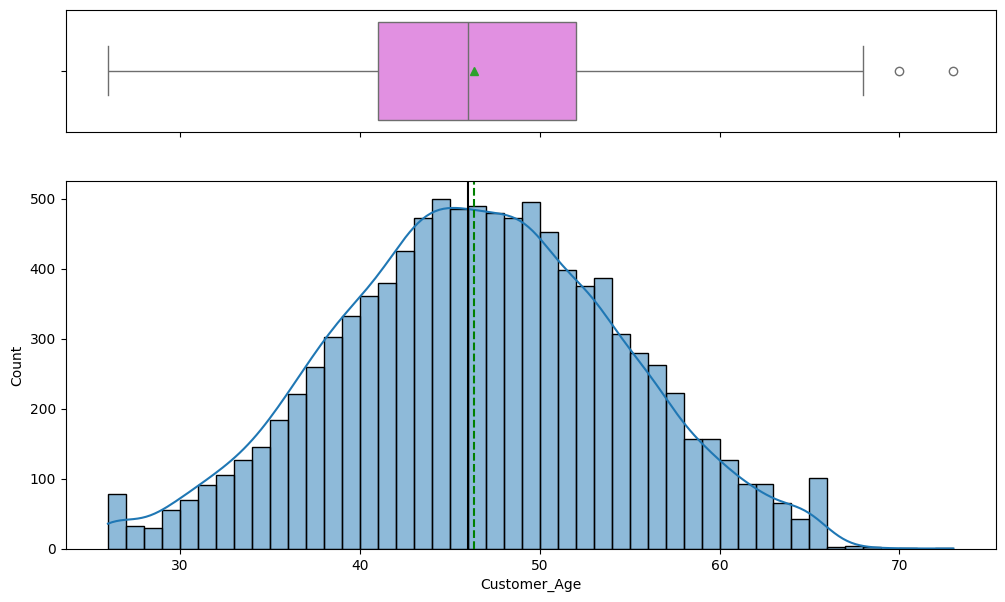

In [261]:
histogram_boxplot(data, "Customer_Age", kde=True)

Age of Customer is distibution varying from 26 to 70s value. Almost uniform with 2 outliers.

### `Months_on_book`

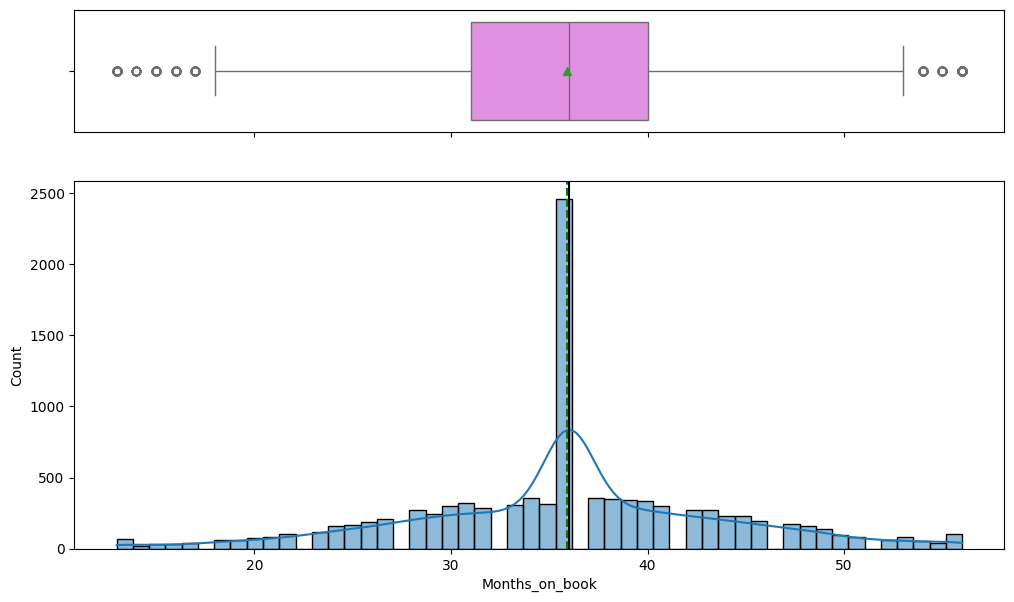

In [262]:
histogram_boxplot(data, "Months_on_book", kde=True)

Most of the customers are on the books for around 35 months

### `Credit_Limit`

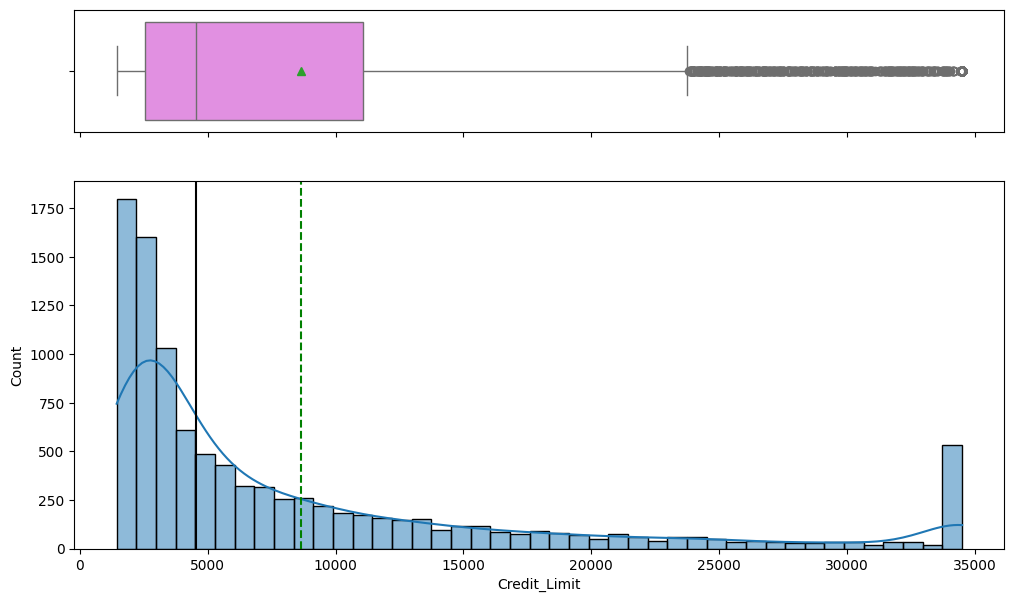

In [263]:
histogram_boxplot(data, "Credit_Limit", kde=True)

Credit Limit distribution is right skewed with many outliers. 50% of the value is below 4500. But Max reaches near 34500.

### `Total_Revolving_Bal`

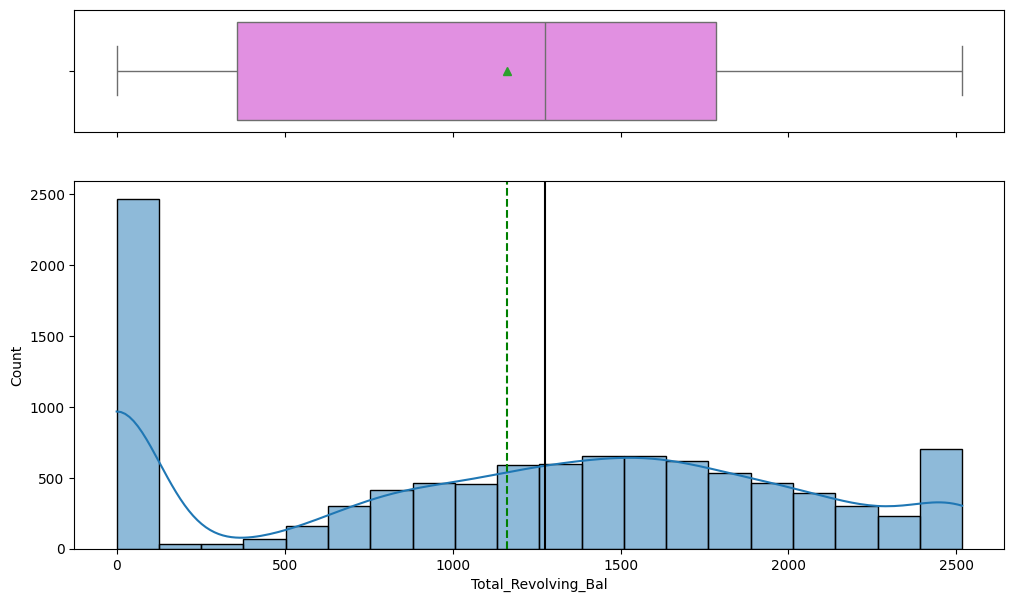

In [264]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

More customers have revolving balance of 0 and 50% of customers have balance below 1300. Customers have balance till 2500

### `Avg_Open_To_Buy`

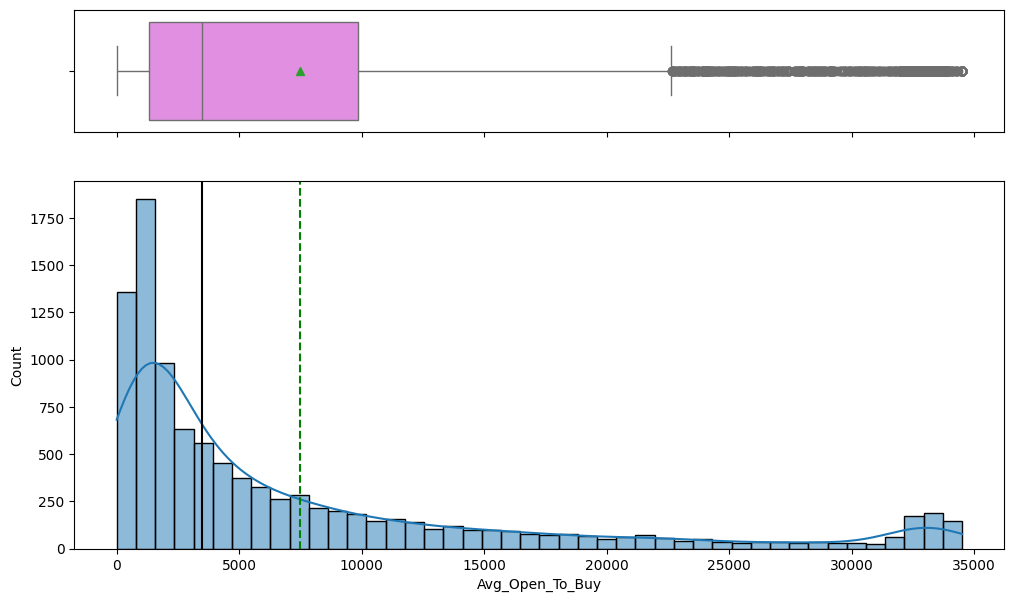

In [265]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

Avg_Open_To_Buy is highly right skewed distribution with many outliers

### `Total_Trans_Ct`

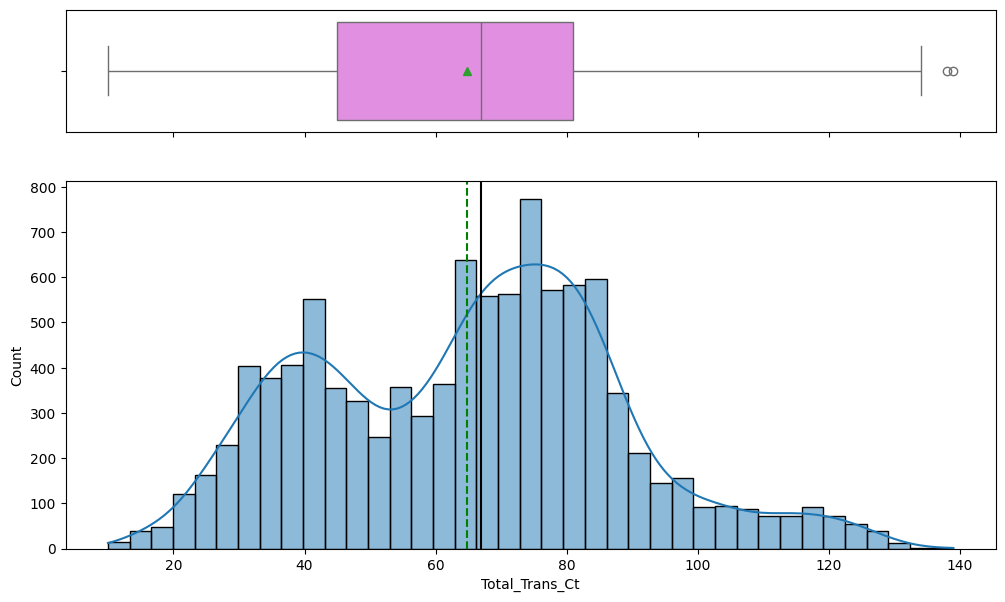

In [266]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

Total_Trans_Ct have peaks at 40 and 78. 50% of customers have value below 63. There are 2-3 outliers in the data

### `Total_Amt_Chng_Q4_Q1`

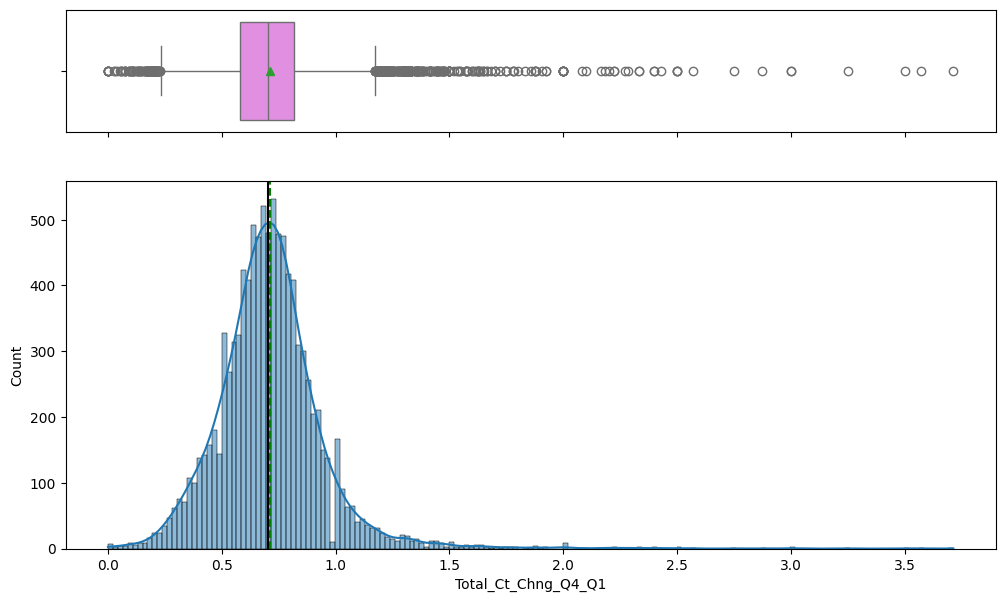

In [267]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

Total_Ct_Chng_Q4_Q1 highly right skewed. There is a distrubution around 0.75 mean but there are many outliers to both sides of minimum and  maximum data

### `Total_Trans_Amt`

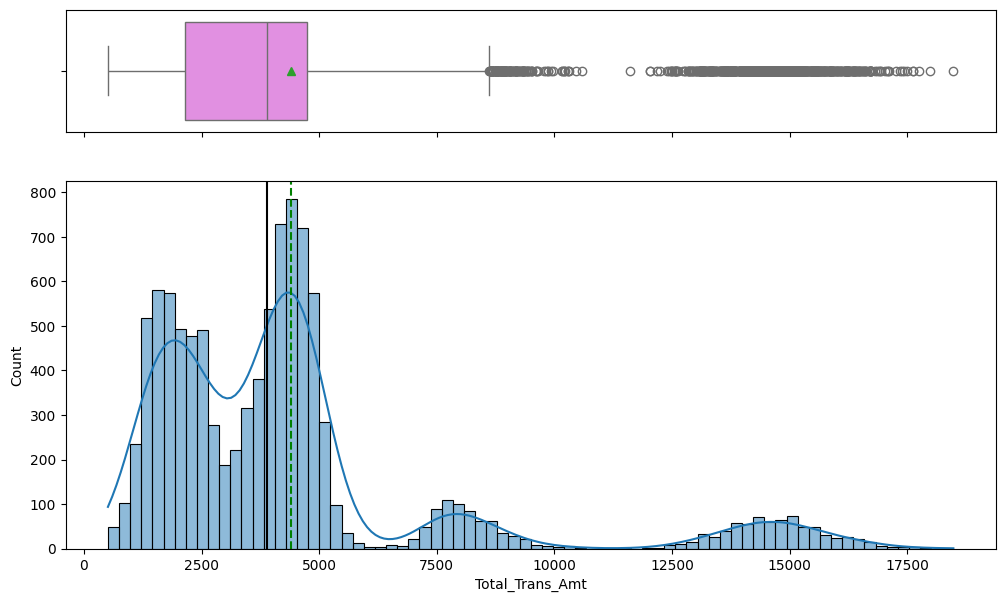

In [268]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

Total_Trans_Amt is an uneven  distribution with peaks at 2800, 4800. 50% of data below 4000. There are many outliers to the right of the graph plot

### `Avg_Utilization_Ratio`

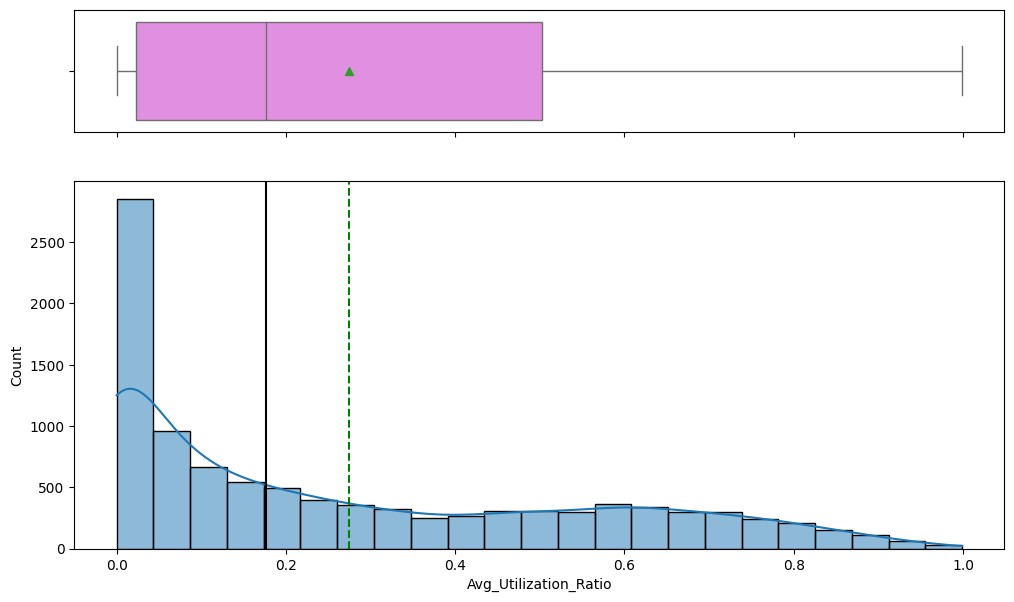

In [269]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

Avg_Utilization_Ratio has peak at 0 which curves down to 1.0. 50% of data is below 0.19%

###  Category Variables

### `Dependent_count`

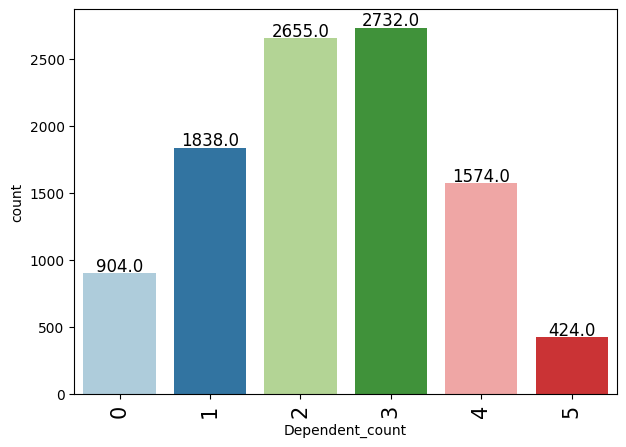

In [270]:
labeled_barplot(data, "Dependent_count")

2732 customers have dependent count of 3 and 2655 have count of 2. Few customers have count of 5.

### `Total_Relationship_Count`

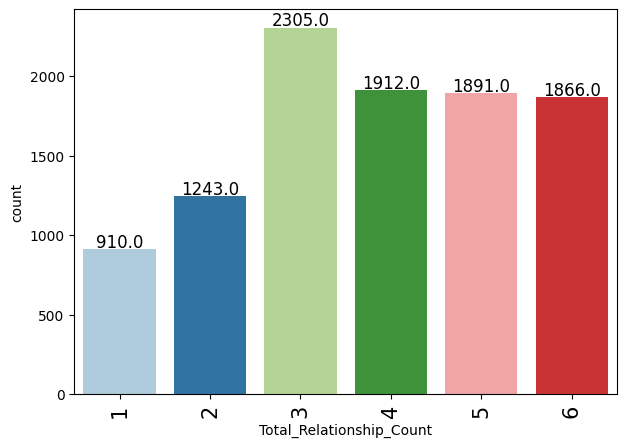

In [271]:
labeled_barplot(data, "Total_Relationship_Count")

Total_Relationship_Count has value of 3 for 2305 custoemrs. Values 4,5 and 6 also have a very good count

### `Months_Inactive_12_mon`




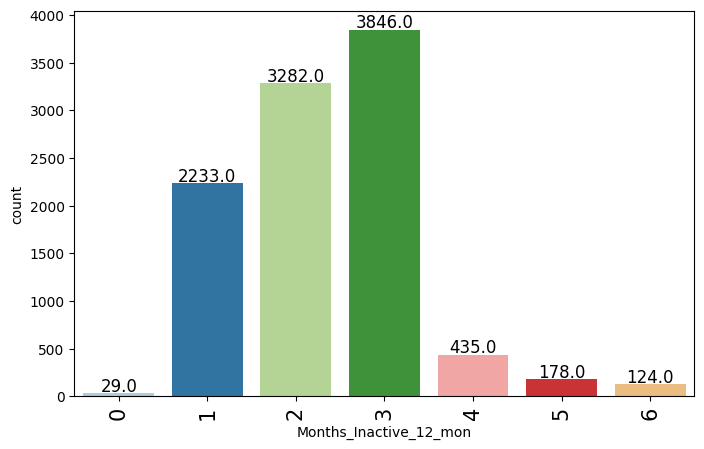

In [272]:
labeled_barplot(data, "Months_Inactive_12_mon")

3846 customers are inactive for 3 months

3282 customers are inactive for 2 months

2233 customers are inactive for 1 month.

There are few cutomers who are inactive for 4,5,6,and 0 months



### `Contacts_Count_12_mon`

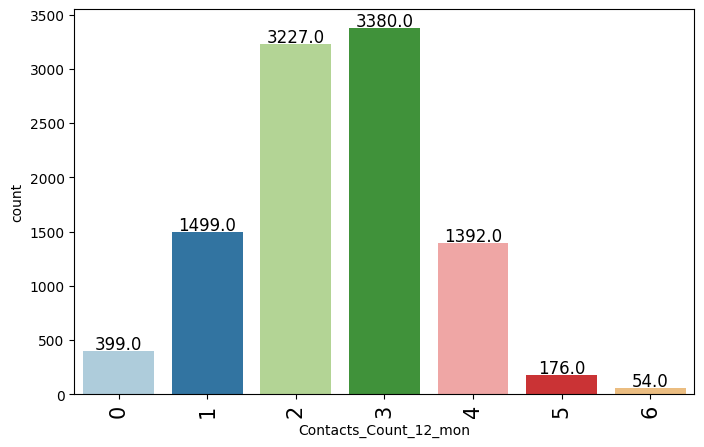

In [273]:
labeled_barplot(data, "Contacts_Count_12_mon")

3380 customers have contacted 3 times in last 12 months

3227 customers for 2 times

399 customers have never contacted in last 12 months

### `Gender`

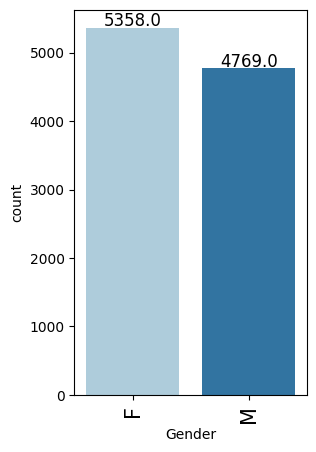

In [274]:
labeled_barplot(data, "Gender")

There are more female customers than male customers

### `Education_Level`

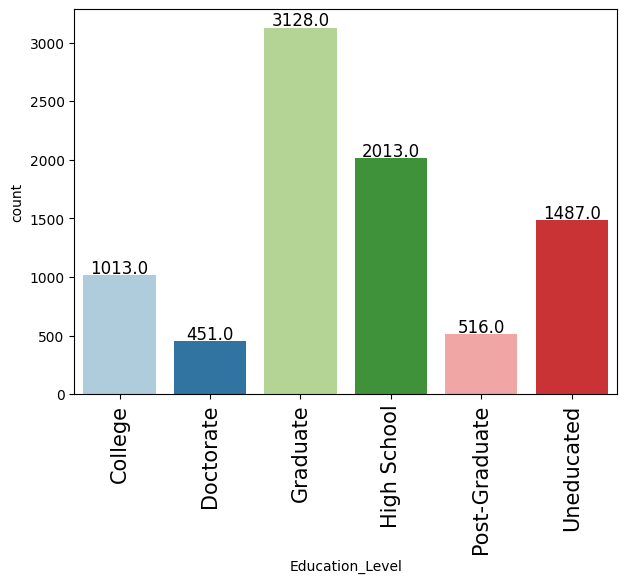

In [275]:
labeled_barplot(data, "Education_Level")

3128 custoemrs are Graduate. 2013 are high school educated 1487 customers are uneducated

### `Marital_Status`

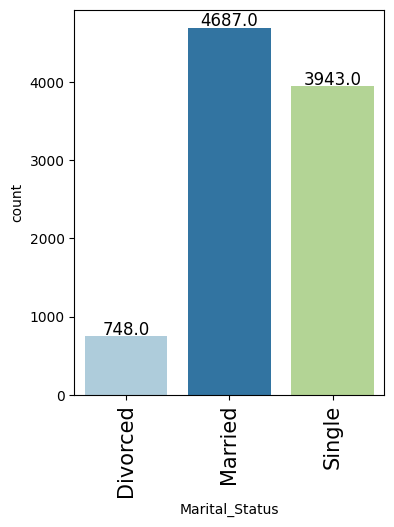

In [276]:
labeled_barplot(data, "Marital_Status")

4687 custoemrs are Married.

3943 are Single and 748 are Divorced

### `Income_Category`

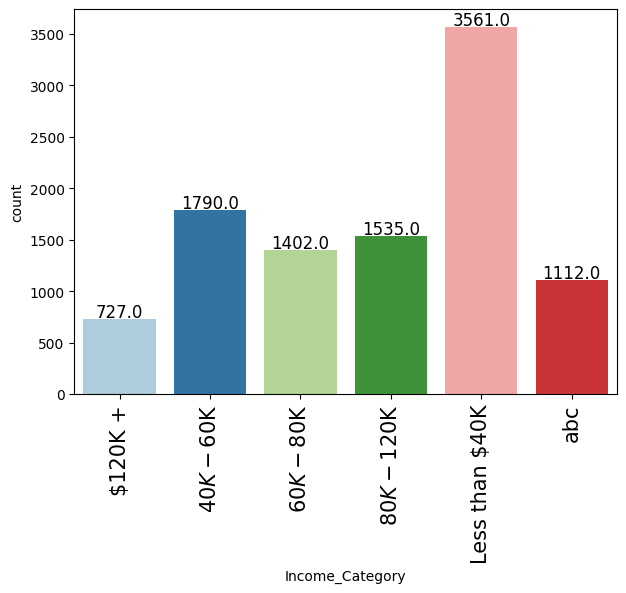

In [277]:
labeled_barplot(data, "Income_Category")

3561 customers have income less than 40K.

There is a category called abc which can be a madeup category

### `Card_Category`

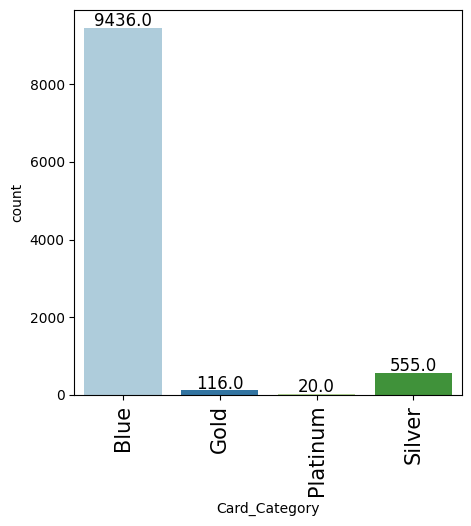

In [278]:
labeled_barplot(data, "Card_Category")

9436 customers have Blue category card. 555 have silver and 116 have gold. 20 have Platinum

### `Attrition_Flag`

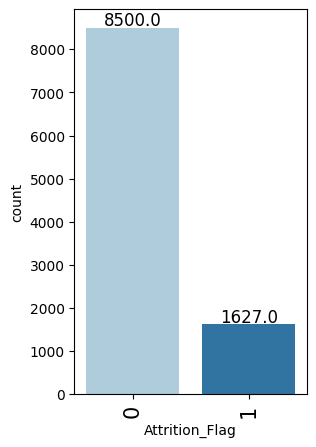

In [279]:
labeled_barplot(data, "Attrition_Flag")

Our target variable Attrition flag have 8500 as Exisiting Customer and 1627 have attrited.

### Bivariate Distributions

### *Correlation Check*

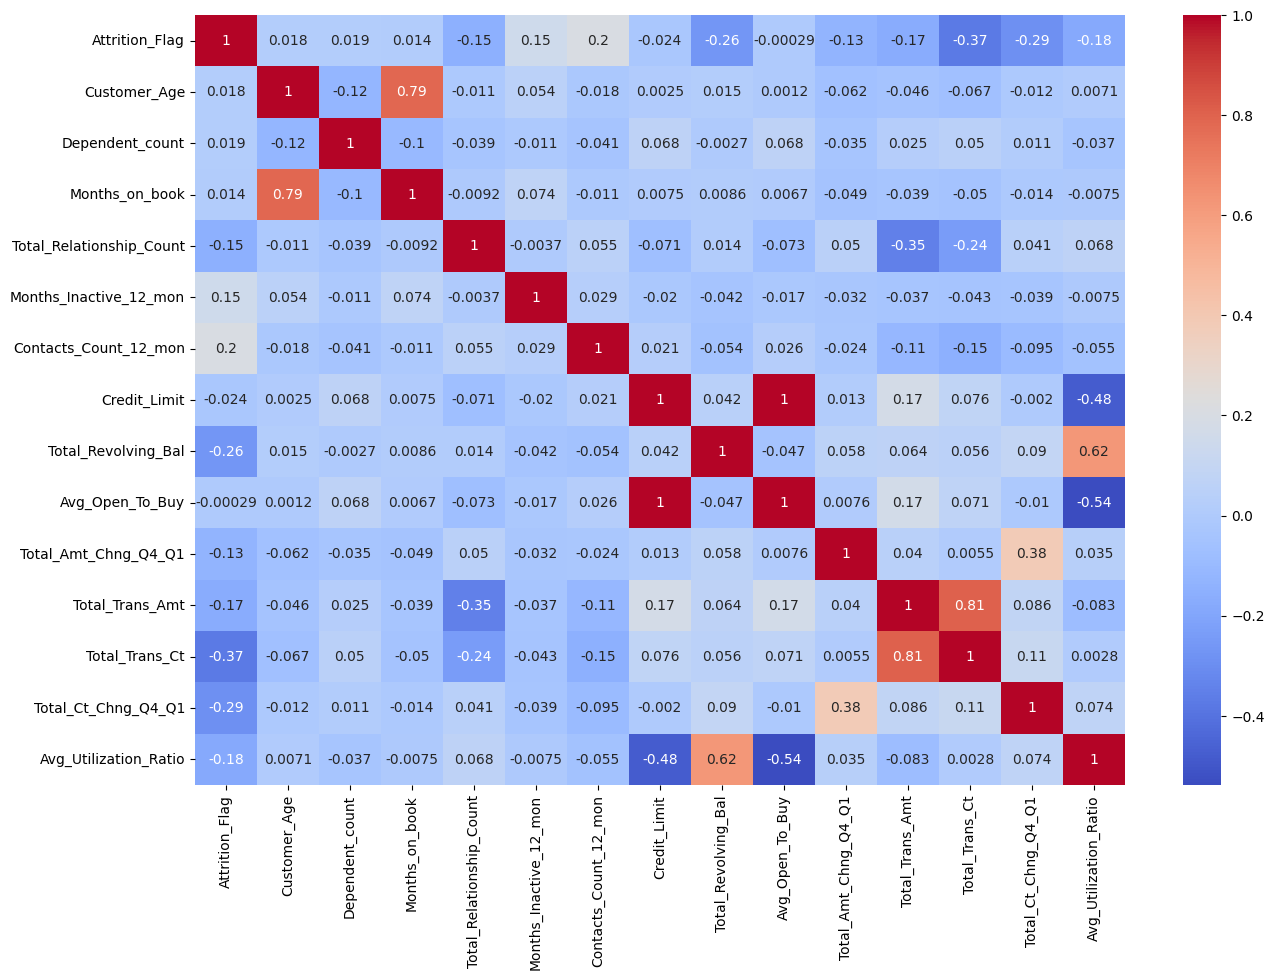

In [280]:
#plot heat map for numerical columns
num_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()


Observations


*   Attrition_Flag may have negavtive correlation with Total_Revolving_Bal,Total_Trans_Ct and Total_Ct_Chng_Q4_Q1
*   Customer_Age and Months_on_book are positively correlated.

*   Total_Trans_Amt and Total_Trans_Ct have strong positive correlation
*   Total_Revolving_Bal and Avg_Utilization_Ratio have positive correlation

*   Credit_Limit and Avg_Open_To_Buy are negatively correlated to Avg_Utilization_Ratio
*   Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 are positively correlated.







### `Attrition_Flag vs Gender`

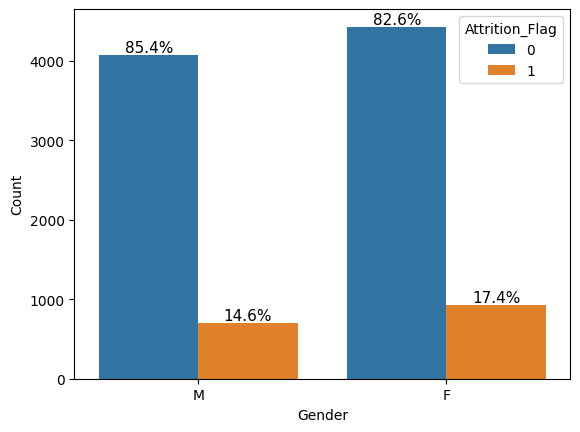

In [281]:
ax3 = sns.countplot(x="Gender", hue="Attrition_Flag", data=data)
ax3.set(xlabel='Gender', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Attrition may be slightly more with Female Customers

### `Attrition_Flag vs Marital_Status`

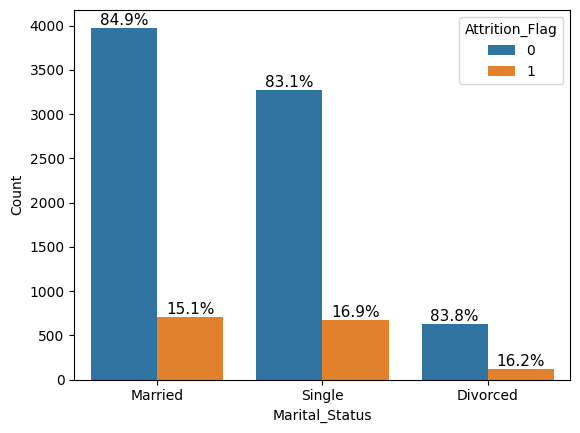

In [282]:
ax3 = sns.countplot(x="Marital_Status", hue="Attrition_Flag", data=data)
ax3.set(xlabel='Marital_Status', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Single Cutomers have more percentage of Attrition next to Divorced and then Married.

Number of divorced customers are less hence number of divorced customers attrited is less

### `Attrition_Flag vs Education_Level`

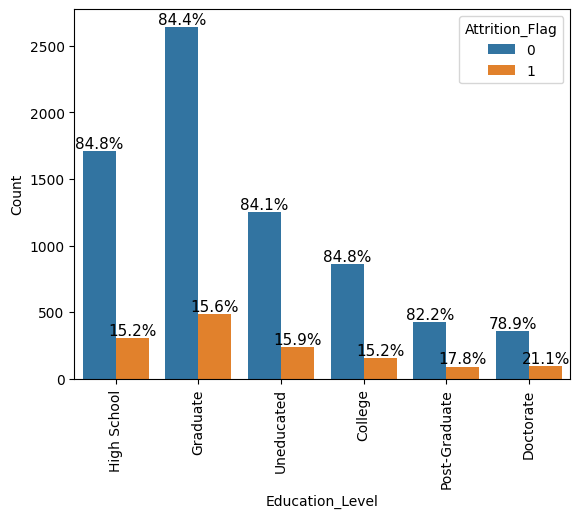

In [283]:
ax3 = sns.countplot(x="Education_Level", hue="Attrition_Flag", data=data)
ax3.set(xlabel='Education_Level', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

There are more Graduate Customers and attrition rate is 15% among graduate customers.

This value is almost same for High school, Uneductaed, College cutomers

Post graduate customers have 17.8% attrition and Doctorate for 21.1 %

### `Attrition_Flag vs Income_Category`

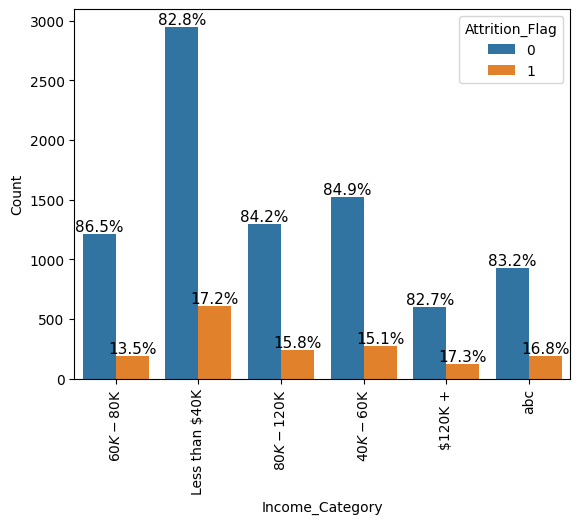

In [284]:
ax3 = sns.countplot(x="Income_Category", hue="Attrition_Flag", data=data)
ax3.set(xlabel='Income_Category', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.xticks(rotation=90)
plt.show()

There are more customers who are less than 40k income and they have an attrition rate of 17.2%

There is a category called abc which could be a data error.

### `Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


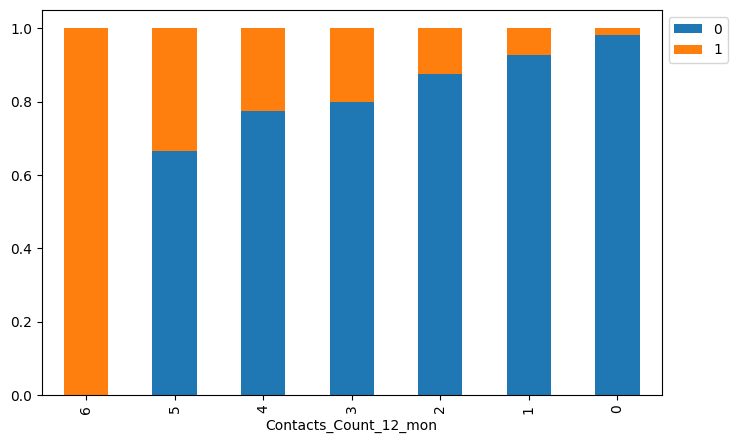

In [285]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag")

The customers who have contcated 6 times in last 12 months have 100% attrition.
Observation that as the customers contact in last 12 months increase, there are more probability that they opt for attrition

### `Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


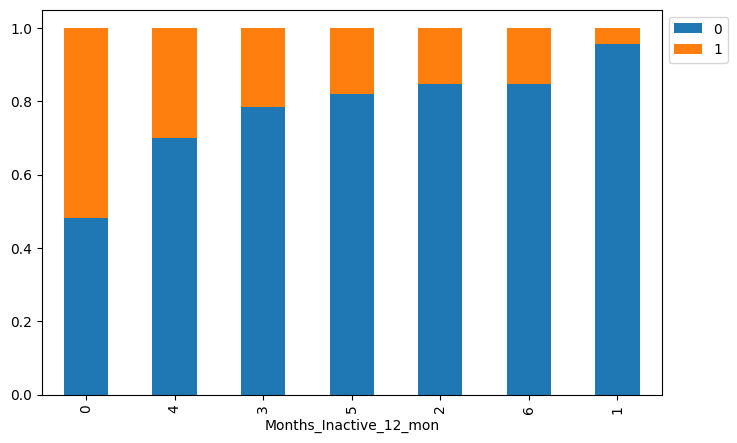

In [286]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag")

Customers who are NOT inactive for last 12 months have nearly 50% attrition.

Customers who are inactive for 4 months have nearly 30% attrition.

Customers who are inactive for 3,5,2 and 6 months have nearly 20% attrition.

Customers who are inactive for just one month have the lowest attrition percentage.


### `Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


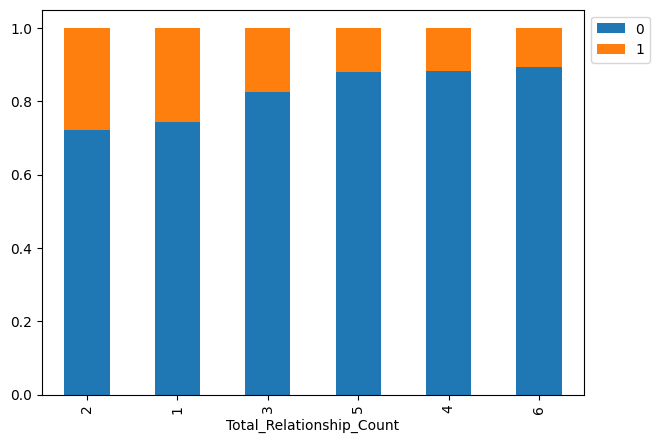

In [287]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag")

We observe that Customers who have Total_Relationship_Count of 6 have less percentage of attrition.

More cutomers with Total_Relationship_Count of 1 and 2 are attrited.

### `Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


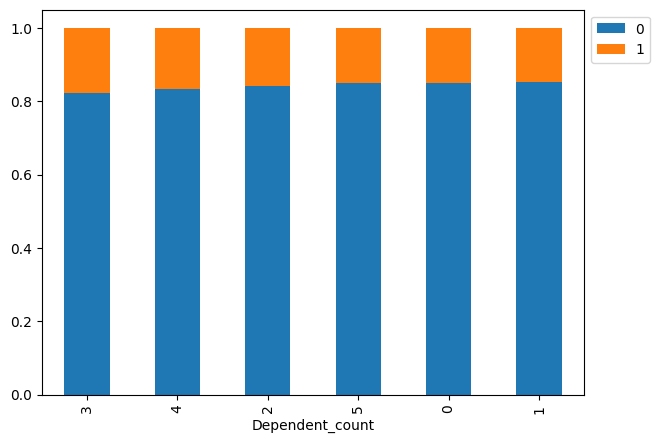

In [288]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag")

Data for Dependent_count 0 to 5 almost have same percentage for attrited customers.

### `Total_Revolving_Bal` vs `Attrition_Flag`

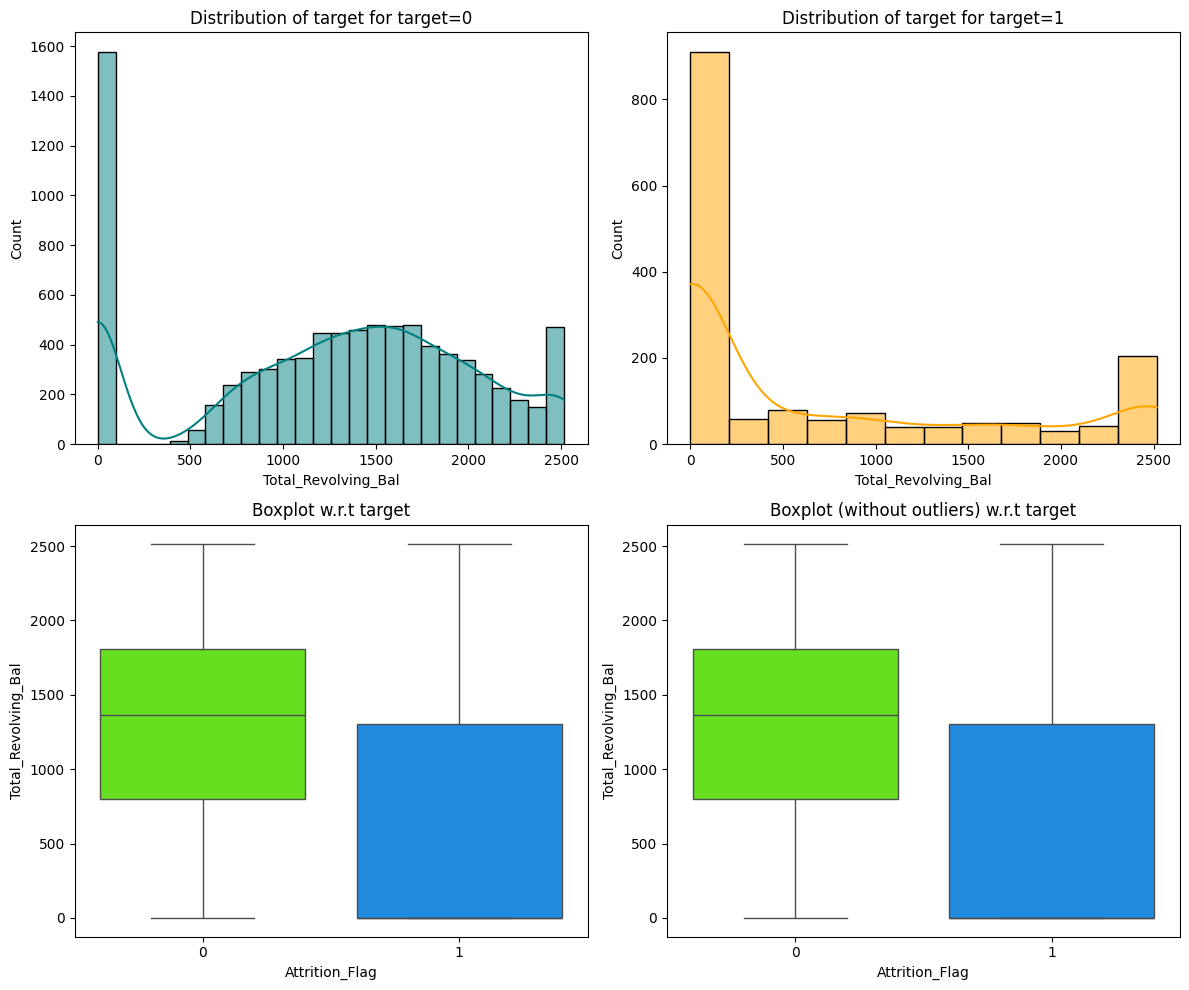

In [289]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

There are no outliers in the data Total_Revolving_Bal.

Customers who have lower Total_Revolving_Bal   are more probable to attrition.


### `Attrition_Flag vs Credit_Limit`

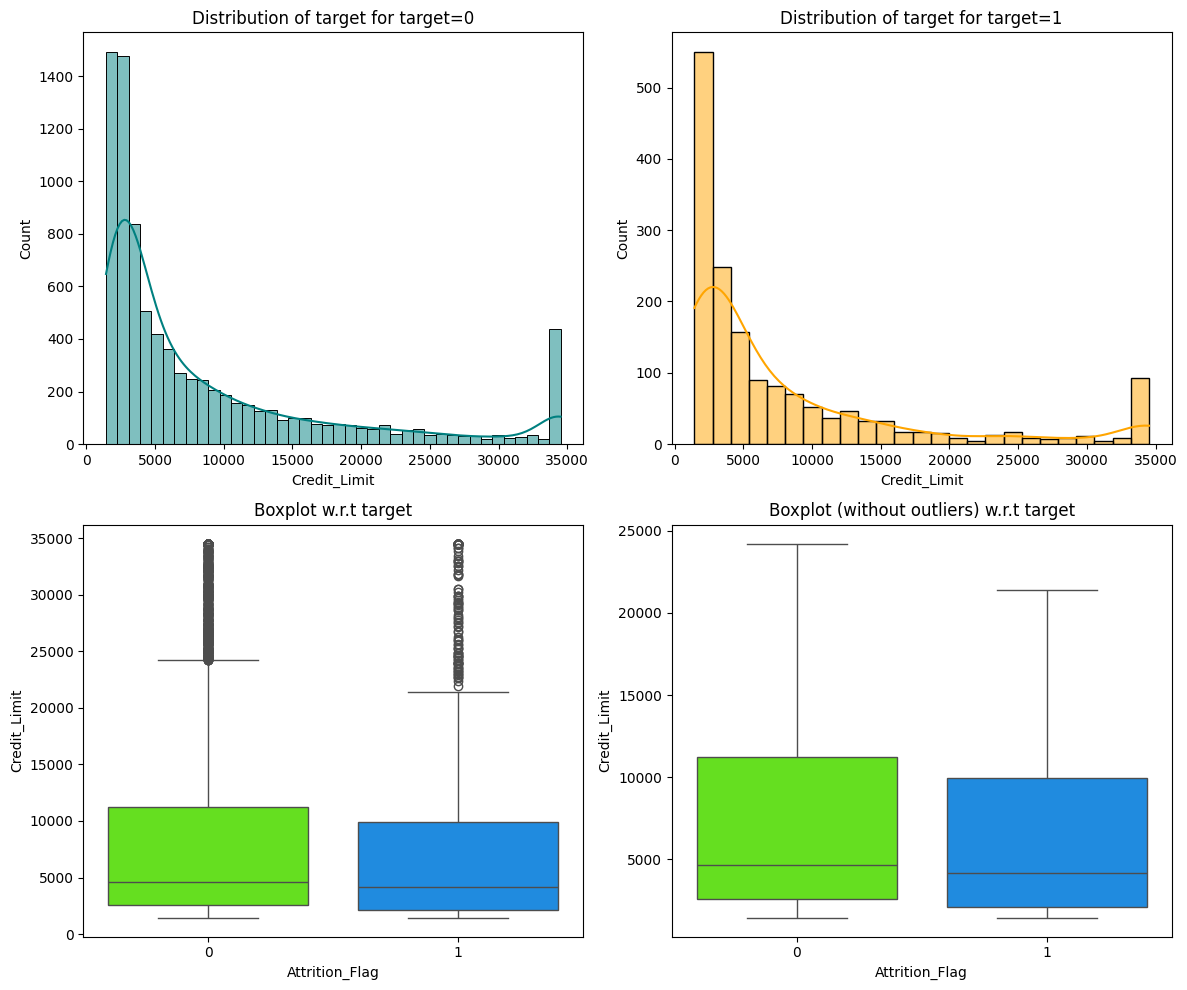

In [290]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

There are many outliers in the Credit Limit data.

Customers who have lower Credit Limit may have more probability of attrition

### `Attrition_Flag vs Customer_Age`

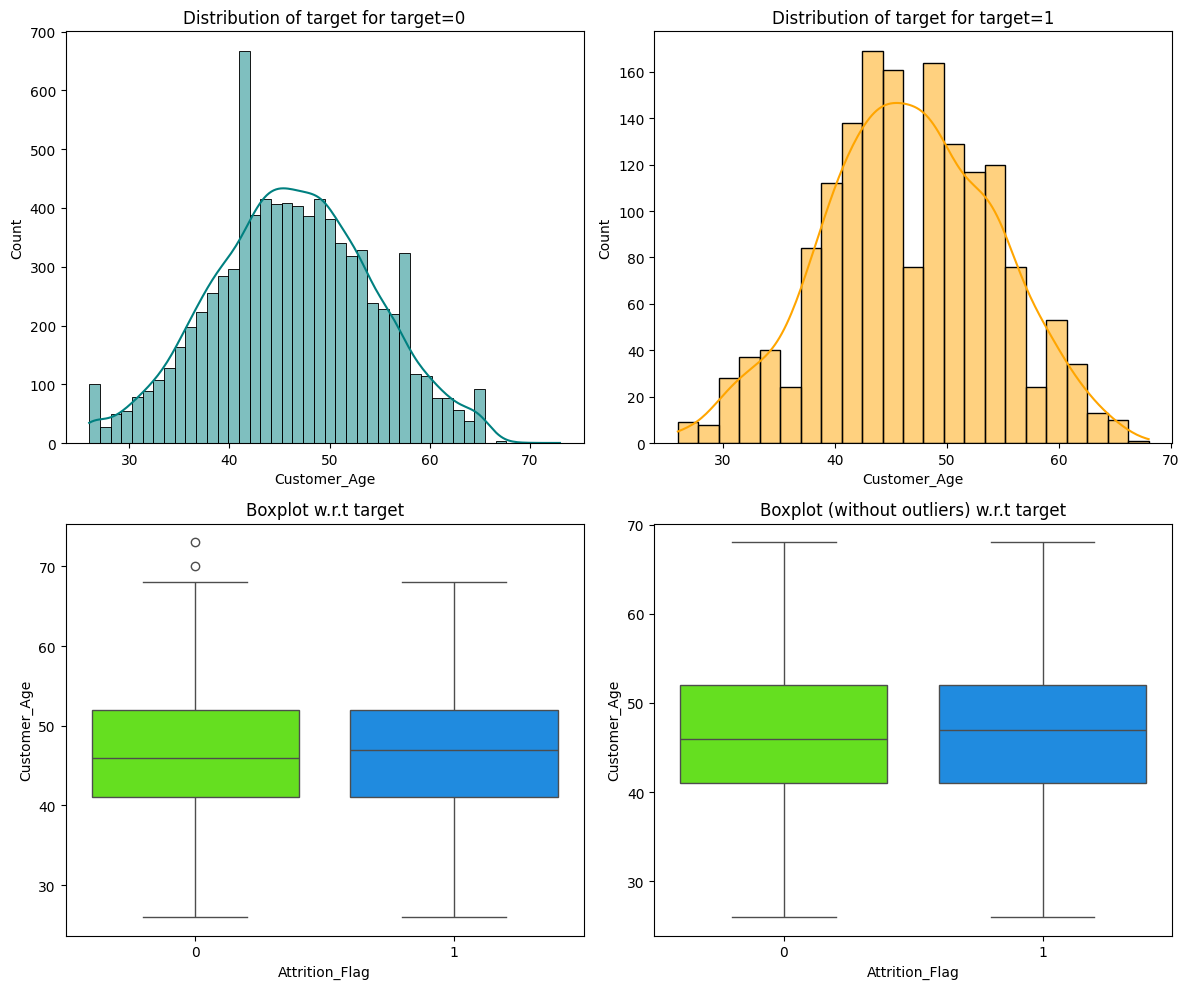

In [291]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

Plot looks similar for Customer age who are attrited or are existing customers

### `Total_Trans_Ct` vs `Attrition_Flag`



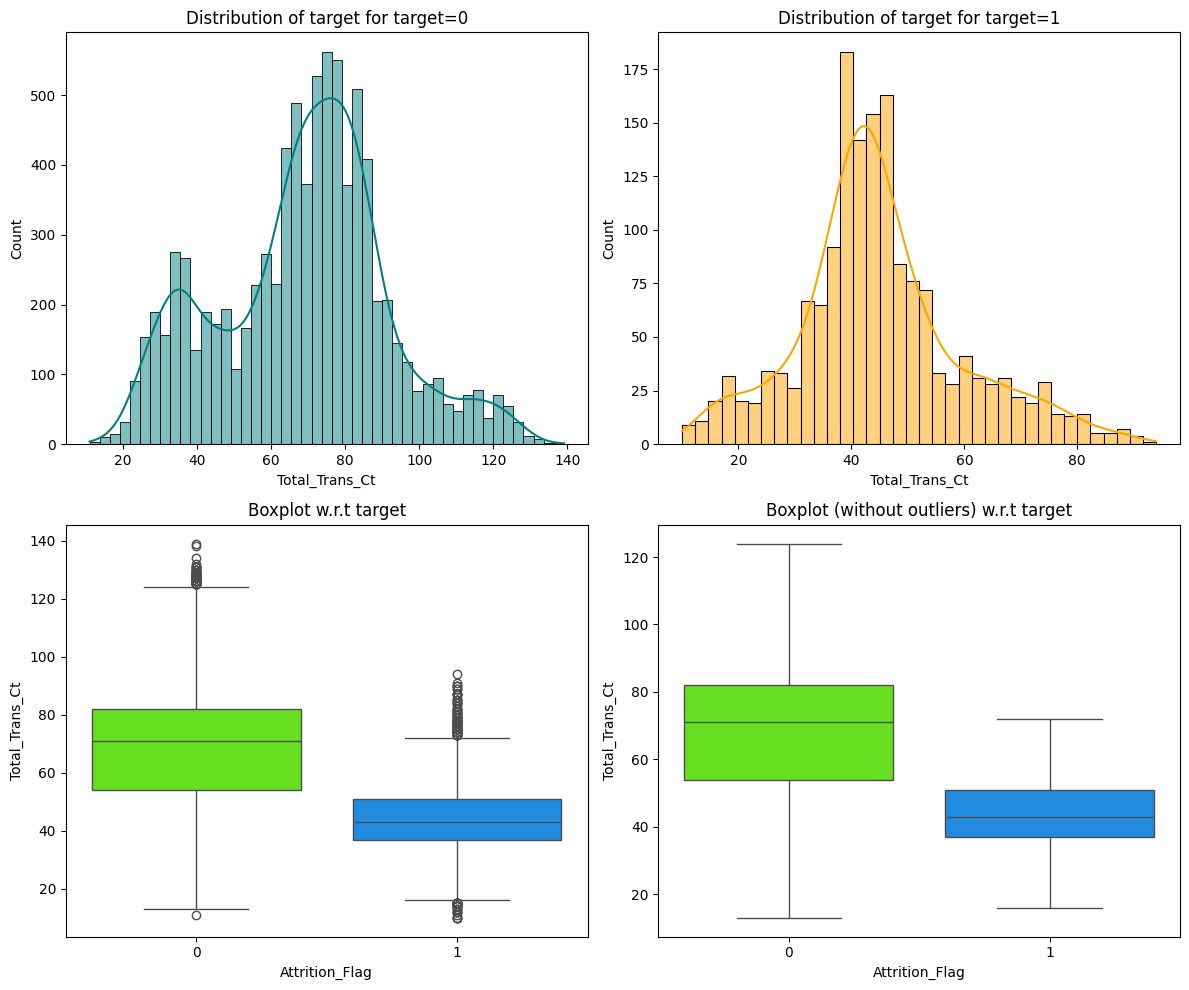

In [292]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

There are many outliers in Total_Trans_Ct data.


Customers who have lower Total_Trans_Ct have more attrition

### `Total_Trans_Amt` vs `Attrition_Flag`

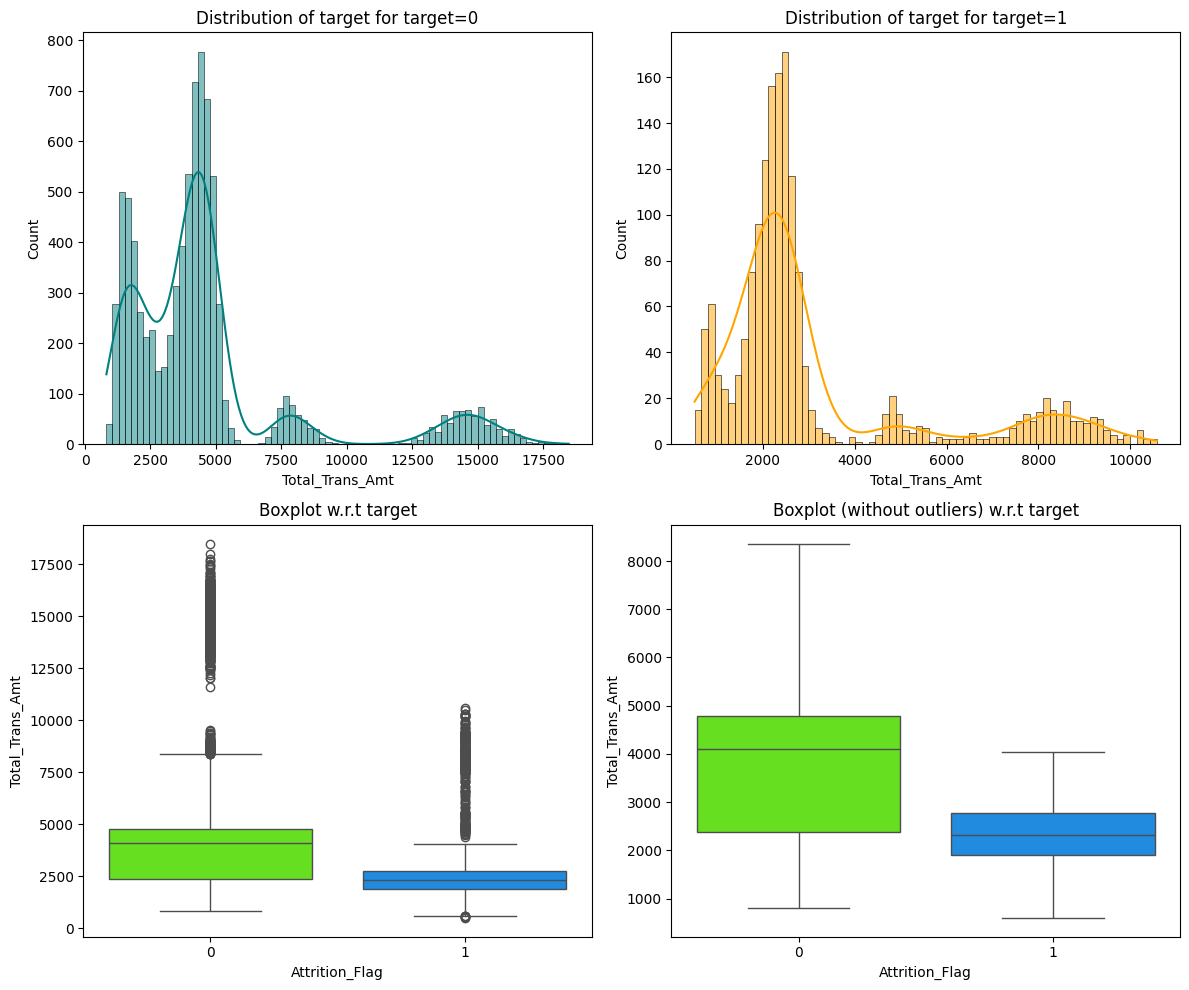

In [293]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

There are many outliers in Total_Trans_Amt data.


Customers who have lower Total_Trans_Amt have more attrition

### `Total_Amt_Chng_Q4_Q1` vs `Attrition_Flag`

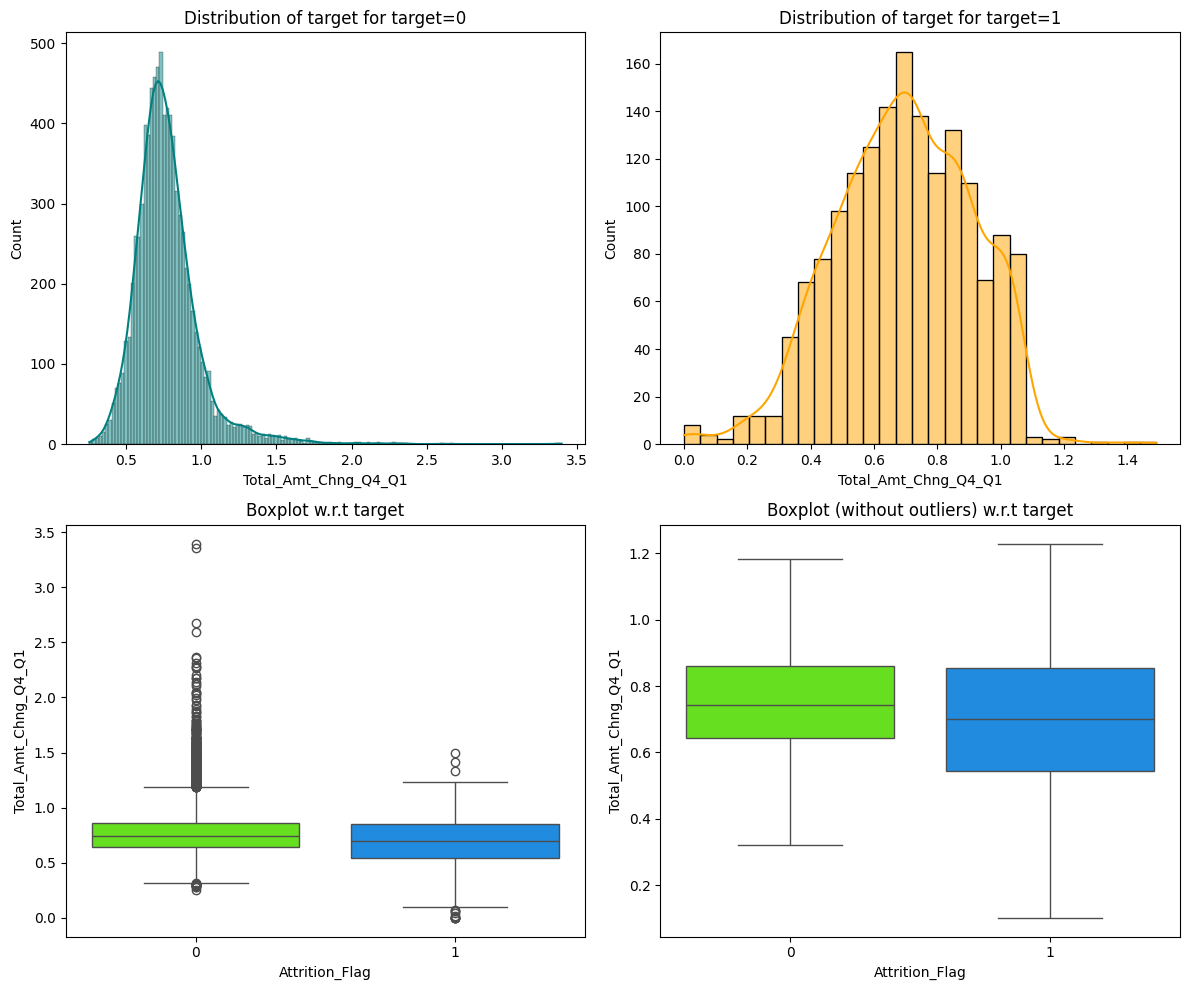

In [294]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

Customers who have larger Total_Amt_Chng_Q4_Q1 stays with the bank

### `Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

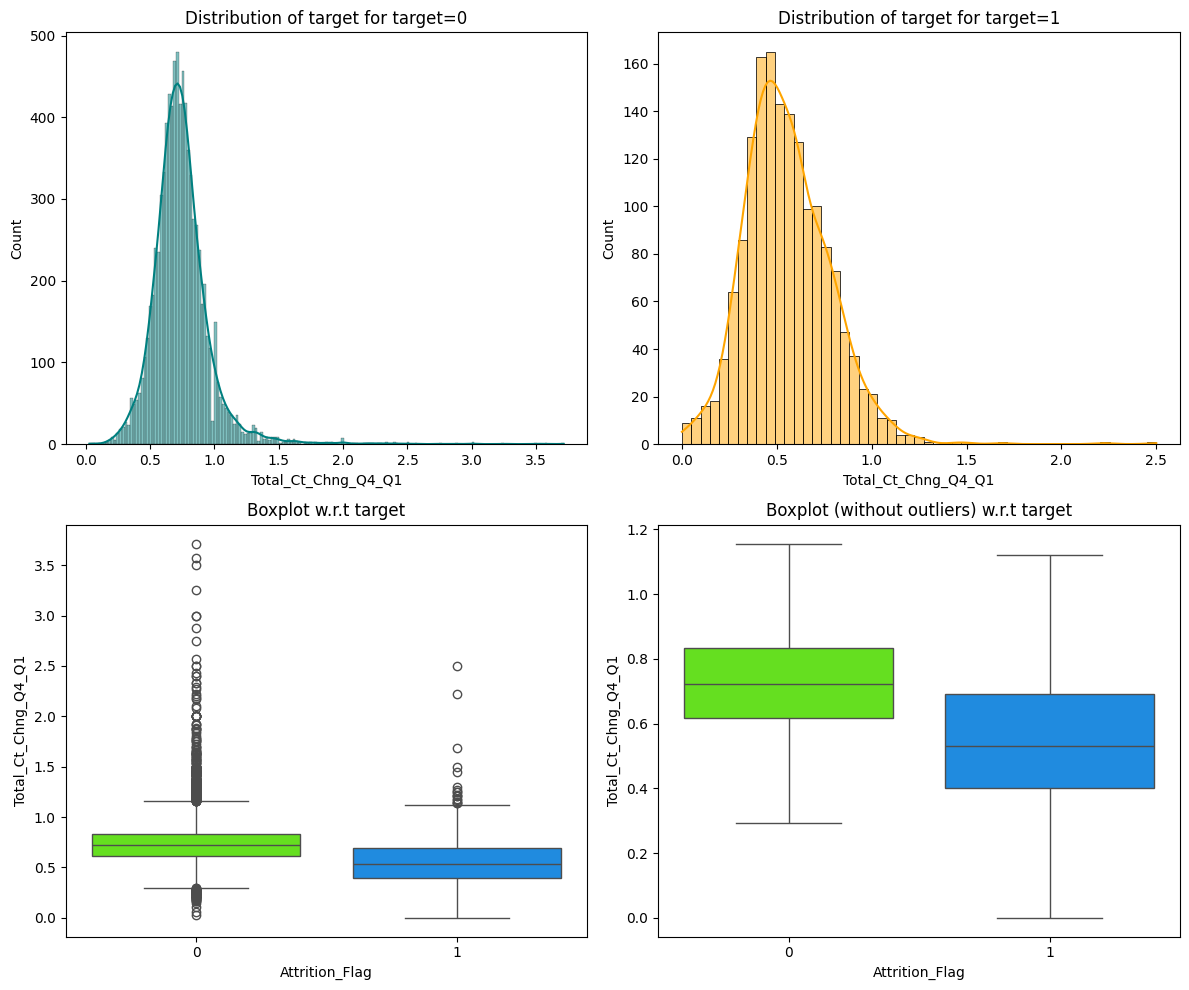

In [295]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

There are many outliers in Total_Ct_Chng_Q4_Q1  data.


Customers who have lower Total_Ct_Chng_Q4_Q1  have more attrition

### `Avg_Utilization_Ratio` vs `Attrition_Flag`

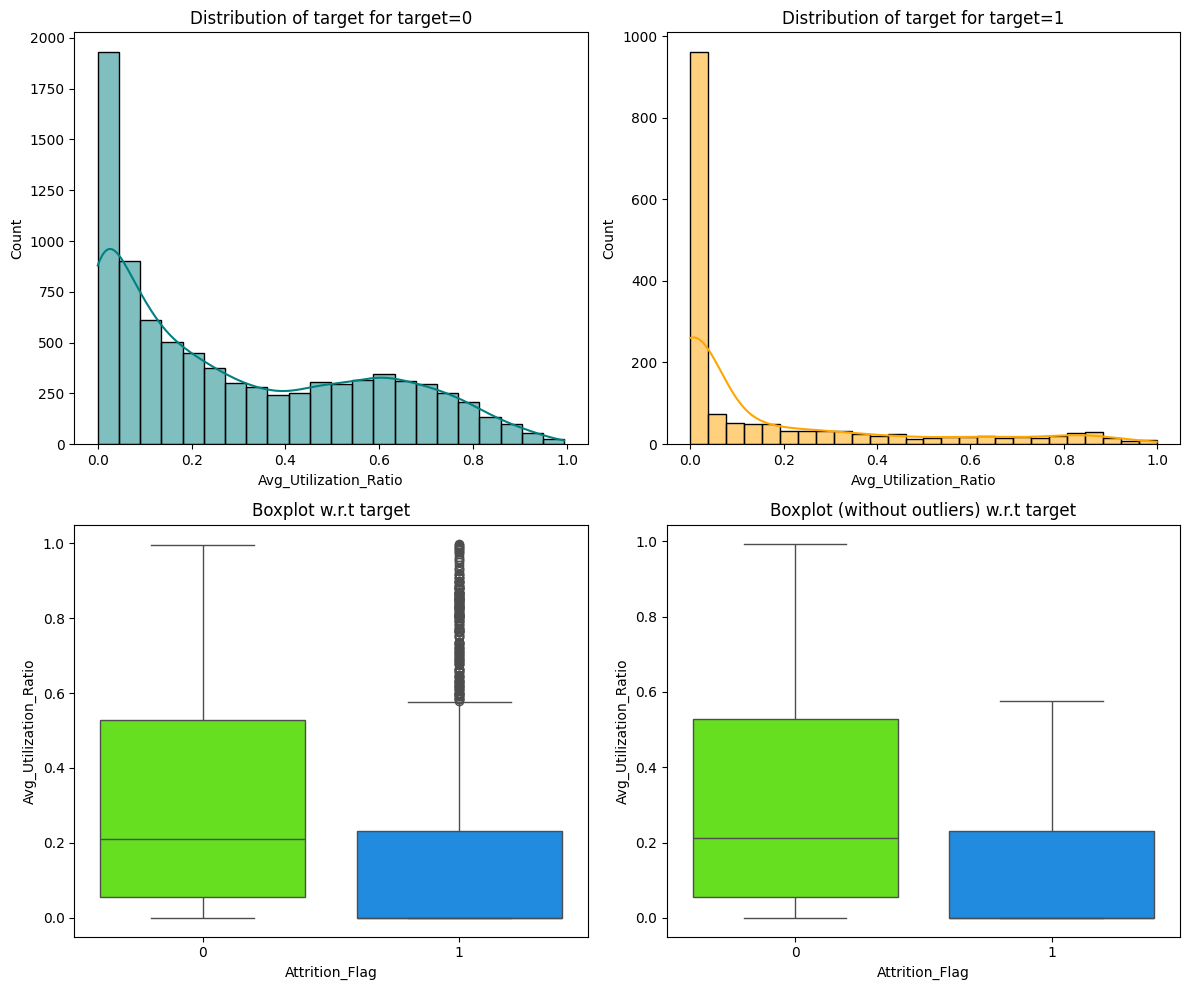

In [296]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

There are many outliers in the Avg_Utilization_Ratio data.

Customers who have lower ratio - below 0.2 accounts for 50% attrited customers

### `Attrition_Flag vs Months_on_book`

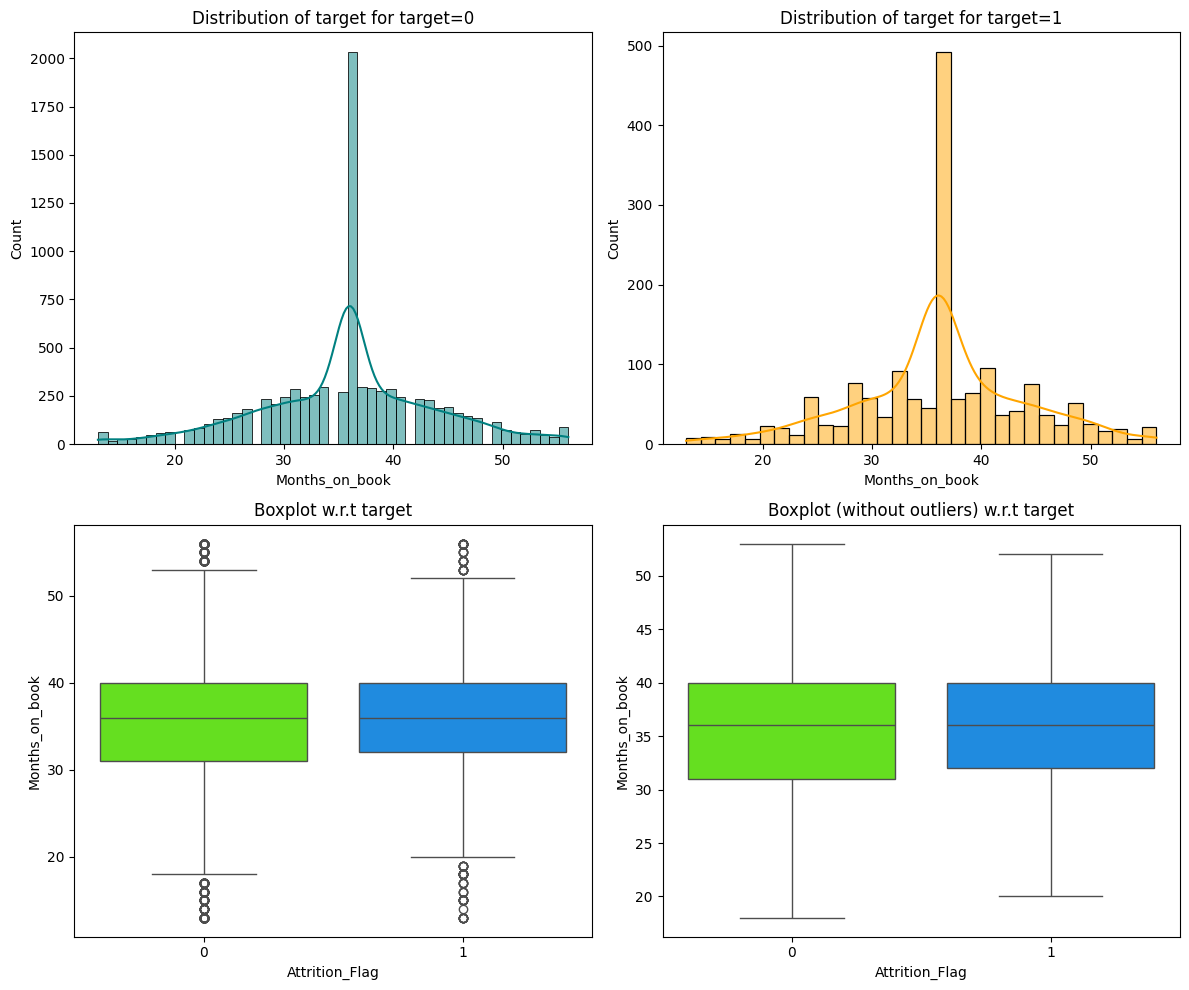

In [297]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

There are outliers below and above the IQR.

Plot looks similar for attrited and existing customers

### `Attrition_Flag vs Total_Revolving_Bal`

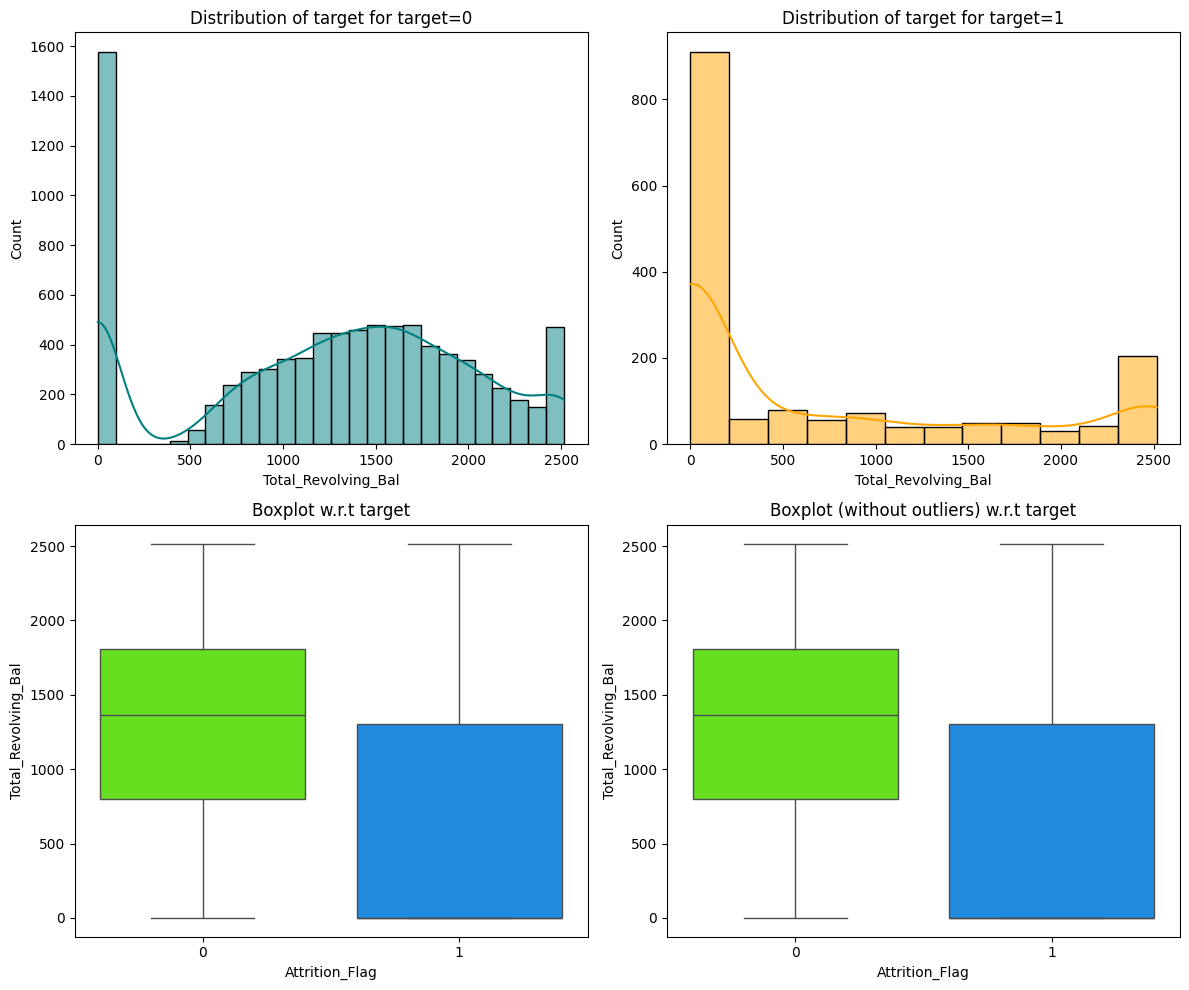

In [298]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

Customers with lower Total_Revolving_Bal have more probability for Attrition

### `Attrition_Flag vs Avg_Open_To_Buy`

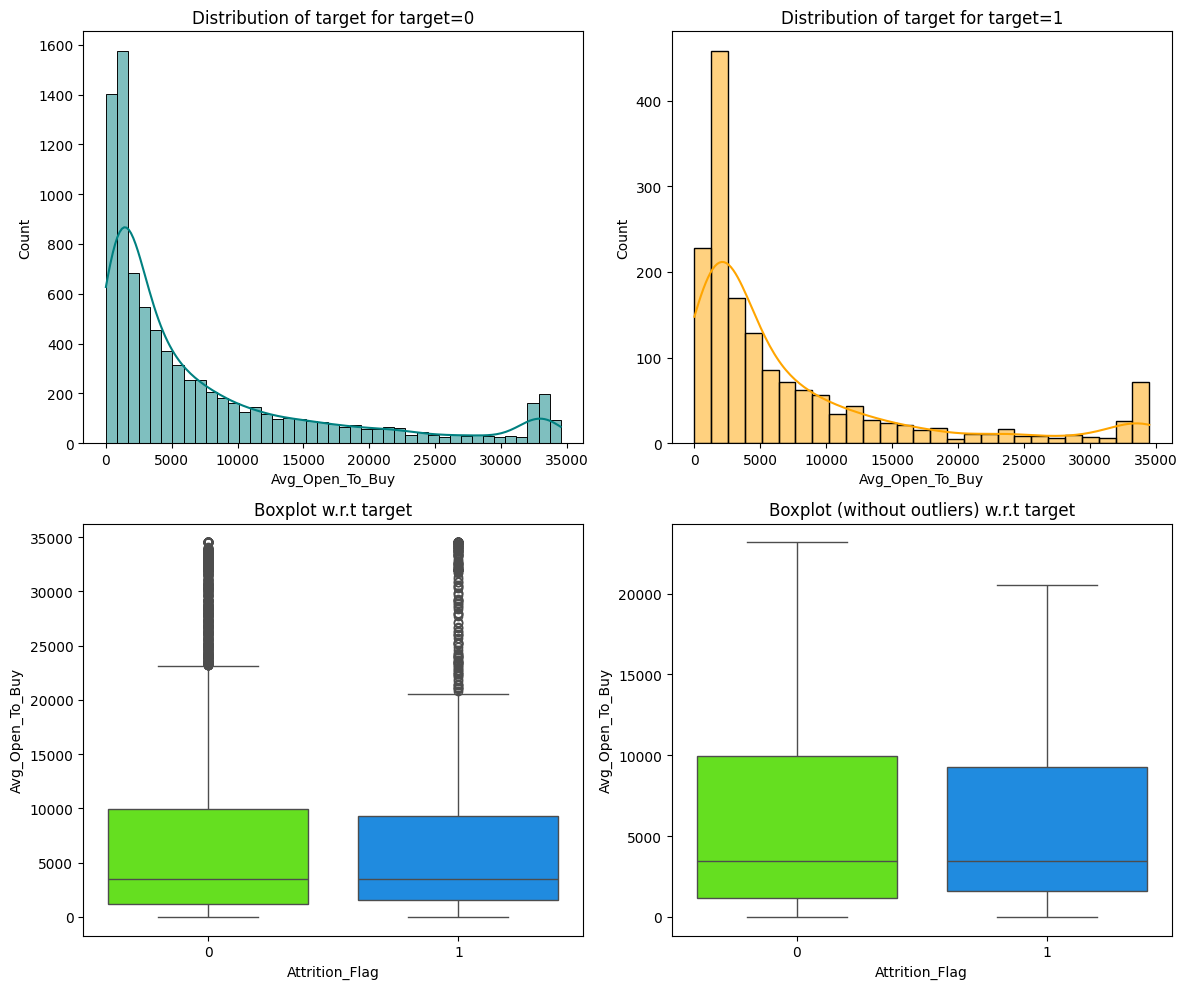

In [299]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

There are outliers in Avg_Open_To_Buy.

Plot looks similar for attrited and existing customers

## Data Pre-processing

### Outlier Detection

In [300]:
#find IQR for numerical columns
num_cols = data.select_dtypes(include=np.number).columns
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Attrition_Flag                0.000
Customer_Age                 11.000
Dependent_count               2.000
Months_on_book                9.000
Total_Relationship_Count      2.000
Months_Inactive_12_mon        1.000
Contacts_Count_12_mon         1.000
Credit_Limit               8512.500
Total_Revolving_Bal        1425.000
Avg_Open_To_Buy            8534.500
Total_Amt_Chng_Q4_Q1          0.228
Total_Trans_Amt            2585.500
Total_Trans_Ct               36.000
Total_Ct_Chng_Q4_Q1           0.236
Avg_Utilization_Ratio         0.480
dtype: float64


In [301]:
# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [302]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

We are not treating outliers since in the real world it is very much likely that few customers have higher Period of relationship with the bank, Credit limit, Average Open to Buy Credit Line, Change in Transaction Amount in Q4, Total Transaction Count, Total Transaction Amount.


We have observed that there is a category 'abc' under income category which seems not a valid data. We will replace this data with nan. We will impute all these data after train and test split to avoid data leakage

In [303]:
#replace 'abc' in Income_Category with np.Nan
data['Income_Category'] = data['Income_Category'].replace('abc', np.nan)

In [304]:
#check Income_Category value counts
data['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

### Split the train, Test and Validation

In [305]:
# drop target variable Attrition_Flag
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [306]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [307]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


### Missing Value Treatment

In [308]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [309]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [310]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

The Missing values have been imputed with Most Frequent value for category variable and mean value for numerical variable.
We made use of the SimpleImputer library from sklearn.impute to accomplish this

### Creating Dummy Variables

In [311]:
#create dummy variables for train, validate and test set
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


There are 29 columns in the data after one hot encoding

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [312]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [313]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [314]:
models_org = []  # Empty list to store all the models


# Appending models into the list
models_org.append(("Bagging", BaggingClassifier(random_state=1)))
models_org.append(("Random forest", RandomForestClassifier(random_state=1)))
models_org.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_org.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_org.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models_org.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))
print("\n" "Training Performance:" "\n")
for name, model in models_org:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models_org:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
dtree: 0.7944785276073619
XGBoost: 0.901840490797546


In [315]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models_org:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9857, Validation Score: 0.8129, Difference: 0.1728
Random forest: Training Score: 1.0000, Validation Score: 0.7975, Difference: 0.2025
GBM: Training Score: 0.8750, Validation Score: 0.8558, Difference: 0.0192
Adaboost: Training Score: 0.8268, Validation Score: 0.8528, Difference: -0.0259
dtree: Training Score: 1.0000, Validation Score: 0.7945, Difference: 0.2055
XGBoost: Training Score: 1.0000, Validation Score: 0.9018, Difference: 0.0982


Best Performance for Validation score with Original Dataset


1.   XGBoost - 90.18 %
2.   Gradient Boost - 85.58 %
1.   Adaboost - 85.28 %














### Model Building with Oversampled data


In [316]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [317]:

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging Oversampled", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest Oversampled", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM Oversampled", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost Oversampled", AdaBoostClassifier(random_state=1)))
models.append(("dtree Oversampled", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models_org.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging Oversampled: 0.9982349480290253
Random forest Oversampled: 1.0
GBM Oversampled: 0.9807805452049422
Adaboost Oversampled: 0.9684251814081193
dtree Oversampled: 1.0

Validation Performance:

Bagging Oversampled: 0.8312883435582822
Random forest Oversampled: 0.8343558282208589
GBM Oversampled: 0.8895705521472392
Adaboost Oversampled: 0.8895705521472392
dtree Oversampled: 0.7944785276073619


In [318]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging Oversampled: Training Score: 0.9982, Validation Score: 0.8313, Difference: 0.1669
Random forest Oversampled: Training Score: 1.0000, Validation Score: 0.8344, Difference: 0.1656
GBM Oversampled: Training Score: 0.9808, Validation Score: 0.8896, Difference: 0.0912
Adaboost Oversampled: Training Score: 0.9684, Validation Score: 0.8896, Difference: 0.0789
dtree Oversampled: Training Score: 1.0000, Validation Score: 0.7945, Difference: 0.2055


Best Performace on Validation score on Oversampled data set


1.   Gradient Boost Oversampled - 88.96 %
2.   Adaboost Oversampled - 88.96 %
1.   Random Forest Oversampled - 83.44 %






### Model Building with Undersampled data

In [319]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [320]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [321]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging Undersampled", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest Undersampled", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM Undersampled", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost Undersampled", AdaBoostClassifier(random_state=1)))
models.append(("dtree Undersampled", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models_org.append(("XGBoost Undersampled", XGBClassifier(random_state=1,eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging Undersampled: 0.9907786885245902
Random forest Undersampled: 1.0
GBM Undersampled: 0.9805327868852459
Adaboost Undersampled: 0.9528688524590164
dtree Undersampled: 1.0

Validation Performance:

Bagging Undersampled: 0.9294478527607362
Random forest Undersampled: 0.9386503067484663
GBM Undersampled: 0.9570552147239264
Adaboost Undersampled: 0.9601226993865031
dtree Undersampled: 0.9202453987730062


In [322]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging Undersampled: Training Score: 0.9908, Validation Score: 0.9294, Difference: 0.0613
Random forest Undersampled: Training Score: 1.0000, Validation Score: 0.9387, Difference: 0.0613
GBM Undersampled: Training Score: 0.9805, Validation Score: 0.9571, Difference: 0.0235
Adaboost Undersampled: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
dtree Undersampled: Training Score: 1.0000, Validation Score: 0.9202, Difference: 0.0798


Best Performace for Validation score on Undersampled data


1.   Adaboost Undersampled - 96%
2.   GBM Undersampled - 95.71%
1.   Random Forest Undersampled - 93.87%






- After building 15 models, it was observed

**Best Performance for Validation score with Original Dataset**

XGBoost - 90.18 %

Gradient Boost - 85.58 %

Adaboost - 85.28 %

**Best Performace on Validation score on Oversampled data set**

Gradient Boost Oversampled - 88.96 %

Adaboost Oversampled - 88.96 %

Random Forest Oversampled - 83.44 %

**Best Performace for Validation score on Undersampled data**

Adaboost Undersampled - 96%

GBM Undersampled - 95.71%

Random Forest Undersampled - 93.87%


We will tune Gradient Boost, Adaboost, Random Forest for original, undersampled and oversampled data and check the performance for the final model selection.

We will also tune XGBoost with original dataset and check if the performance improves.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning for Gradient Boosting with original data

In [323]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8104395604395604:


In [324]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [325]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.972,0.867,0.955,0.909


In [326]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

,Accuracy,Recall,Precision,F1
0,0.968,0.862,0.937,0.898


#### Tuning method for Gradient Boosting with Over sampled data

In [327]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.945286035906021:


In [328]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [329]:
# Checking model's performance on training set
gbm_train_over = model_performance_classification_sklearn(
    tuned_gbm_over, X_train_over, y_train_over
)
gbm_train_over

,Accuracy,Recall,Precision,F1
0,0.932,0.955,0.913,0.934


In [330]:
# Checking model's performance on validation set
gbm_val_over = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_val_over

,Accuracy,Recall,Precision,F1
0,0.911,0.914,0.661,0.767


#### Tuning method for Gradient Boosting with Under sampled data

In [331]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508267922553637:


In [332]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [333]:
# Checking model's performance on training set
gbm_train_un = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
gbm_train_un

,Accuracy,Recall,Precision,F1
0,0.970,0.977,0.964,0.970


In [334]:
# Checking model's performance on validation set
gbm_val_un = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm_val_un

,Accuracy,Recall,Precision,F1
0,0.938,0.957,0.738,0.833


####Tuning method for AdaBoosting with original data

In [335]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8360596546310832:


In [336]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [337]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,0.982,0.927,0.961,0.944


In [338]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.967,0.856,0.933,0.893


#### Tuning method for AdaBoosting with Over Sampled data

In [339]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9403840751217073:


In [340]:
tuned_adb_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=75,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=75, random_state=1)

In [341]:
# Checking model's performance on training set
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_train_over

,Accuracy,Recall,Precision,F1
0,0.928,0.955,0.907,0.930


In [342]:
# Checking model's performance on validation set
adb_val_over = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_val_over

,Accuracy,Recall,Precision,F1
0,0.897,0.887,0.628,0.735


#### Tuning method for AdaBoosting with Undersampled data

In [343]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9467346938775512:


In [344]:
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [345]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
adb_train_un

,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [346]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
adb_val_un

,Accuracy,Recall,Precision,F1
0,0.937,0.966,0.731,0.832


#### Tuning method for Random Forest with original data

In [347]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 25, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.7428152799581371:


In [348]:
tuned_rfc = RandomForestClassifier(
    random_state=1,
    n_estimators=25,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.5

)
tuned_rfc.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=25, random_state=1)

In [349]:
# Checking model's performance on training set
rfc_train = model_performance_classification_sklearn(tuned_rfc, X_train, y_train)
rfc_train

,Accuracy,Recall,Precision,F1
0,0.991,0.951,0.996,0.973


In [350]:
# Checking model's performance on validation set
rfc_val = model_performance_classification_sklearn(tuned_rfc, X_val, y_val)
rfc_val

,Accuracy,Recall,Precision,F1
0,0.954,0.785,0.914,0.845


#### Tuning method for Random Forest with Oversampled data

In [351]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9617645134599473:


In [352]:
tuned_rfc_over = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.6

)
tuned_rfc_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [353]:
# Checking model's performance on training set
rfc_train_over = model_performance_classification_sklearn(tuned_rfc_over, X_train, y_train)
rfc_train_over

,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.993,0.996


In [354]:
# Checking model's performance on validation set
rfc_val_over = model_performance_classification_sklearn(tuned_rfc_over, X_val, y_val)
rfc_val_over

,Accuracy,Recall,Precision,F1
0,0.952,0.825,0.871,0.847


#### Tuning method for Random Forest with Under sampled data

In [355]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9252014652014653:


In [356]:
tuned_rfc_un = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.4

)
tuned_rfc_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.4, n_estimators=110, random_state=1)

In [357]:
# Checking model's performance on training set
rfc_train_un = model_performance_classification_sklearn(tuned_rfc_un, X_train_un, y_train_un)
rfc_train_un

,Accuracy,Recall,Precision,F1
0,0.987,0.994,0.980,0.987


In [358]:
# Checking model's performance on validation set
rfc_val_un = model_performance_classification_sklearn(tuned_rfc_un, X_val, y_val)
rfc_val_un

,Accuracy,Recall,Precision,F1
0,0.923,0.929,0.695,0.795


#### Tuning XGBoost Model with Original data

In [359]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.921098901098901:


In [360]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3,
)
tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [361]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.988,1.000,0.932,0.965


In [362]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.965,0.942,0.855,0.896


## Model Comparison and Final Model Selection

### Training set final performance

In [363]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        adb_train_over.T,
        adb_train_un.T,
        rfc_train.T,
        rfc_train_over.T,
        rfc_train_un.T,
        gbm_train.T,
        gbm_train_over.T,
        gbm_train_un.T,
        xgb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Original",
    "AdaBoost Oversampled",
    "Ada Undersampled",
    "Random Forest Original",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Gradient Boosting Original",
    "Gradient Boosting Oversampled",
    "Gradient Boosting Undersampled",
    "XGBoost Original",

]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Original,AdaBoost Oversampled,Ada Undersampled,Random Forest Original,Random Forest Oversampled,Random Forest Undersampled,Gradient Boosting Original,Gradient Boosting Oversampled,Gradient Boosting Undersampled,XGBoost Original
Accuracy,0.982,0.928,0.973,0.991,0.999,0.987,0.972,0.932,0.970,0.988
Recall,0.927,0.955,0.978,0.951,1.000,0.994,0.867,0.955,0.977,1.000
Precision,0.961,0.907,0.968,0.996,0.993,0.980,0.955,0.913,0.964,0.932
F1,0.944,0.930,0.973,0.973,0.996,0.987,0.909,0.934,0.970,0.965


In [364]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        adb_val_over.T,
        adb_val_un.T,
        rfc_val.T,
        rfc_val_over.T,
        rfc_val_un.T,
        gbm_val.T,
        gbm_val_over.T,
        gbm_val_un.T,
        xgb_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Original",
    "AdaBoost Oversampled",
    "Ada Undersampled",
    "Random Forest Original",
    "Random Forest Oversampled",
    "Random Forest Undersampled",
    "Gradient Boosting Original",
    "Gradient Boosting Oversampled",
    "Gradient Boosting Undersampled",
    "XGBoost Original",

]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost Original,AdaBoost Oversampled,Ada Undersampled,Random Forest Original,Random Forest Oversampled,Random Forest Undersampled,Gradient Boosting Original,Gradient Boosting Oversampled,Gradient Boosting Undersampled,XGBoost Original
Accuracy,0.967,0.897,0.937,0.954,0.952,0.923,0.968,0.911,0.938,0.965
Recall,0.856,0.887,0.966,0.785,0.825,0.929,0.862,0.914,0.957,0.942
Precision,0.933,0.628,0.731,0.914,0.871,0.695,0.937,0.661,0.738,0.855
F1,0.893,0.735,0.832,0.845,0.847,0.795,0.898,0.767,0.833,0.896


**Best Recall is given by Adaboost Classifier with undersampled data** - 0.966 Recall

In [365]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb_un, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.934,0.969,0.718,0.825


****We have a recall of 96.9% in the test data which is a very good value. Hence we select the Adaboost Classifer with Under sampled data as our Model ****

Printing the confusion matrix for test data with Adaboost Undersampled data model

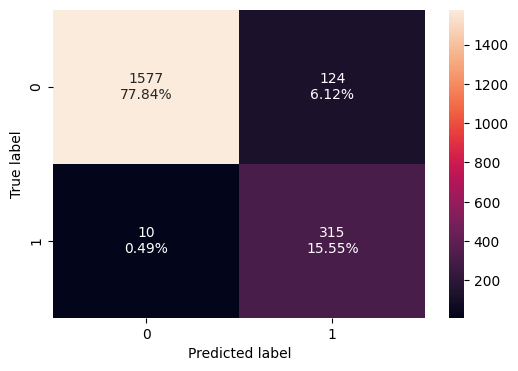

In [366]:
confusion_matrix_sklearn(tuned_adb_un, X_test, y_test)

### Feature Importance

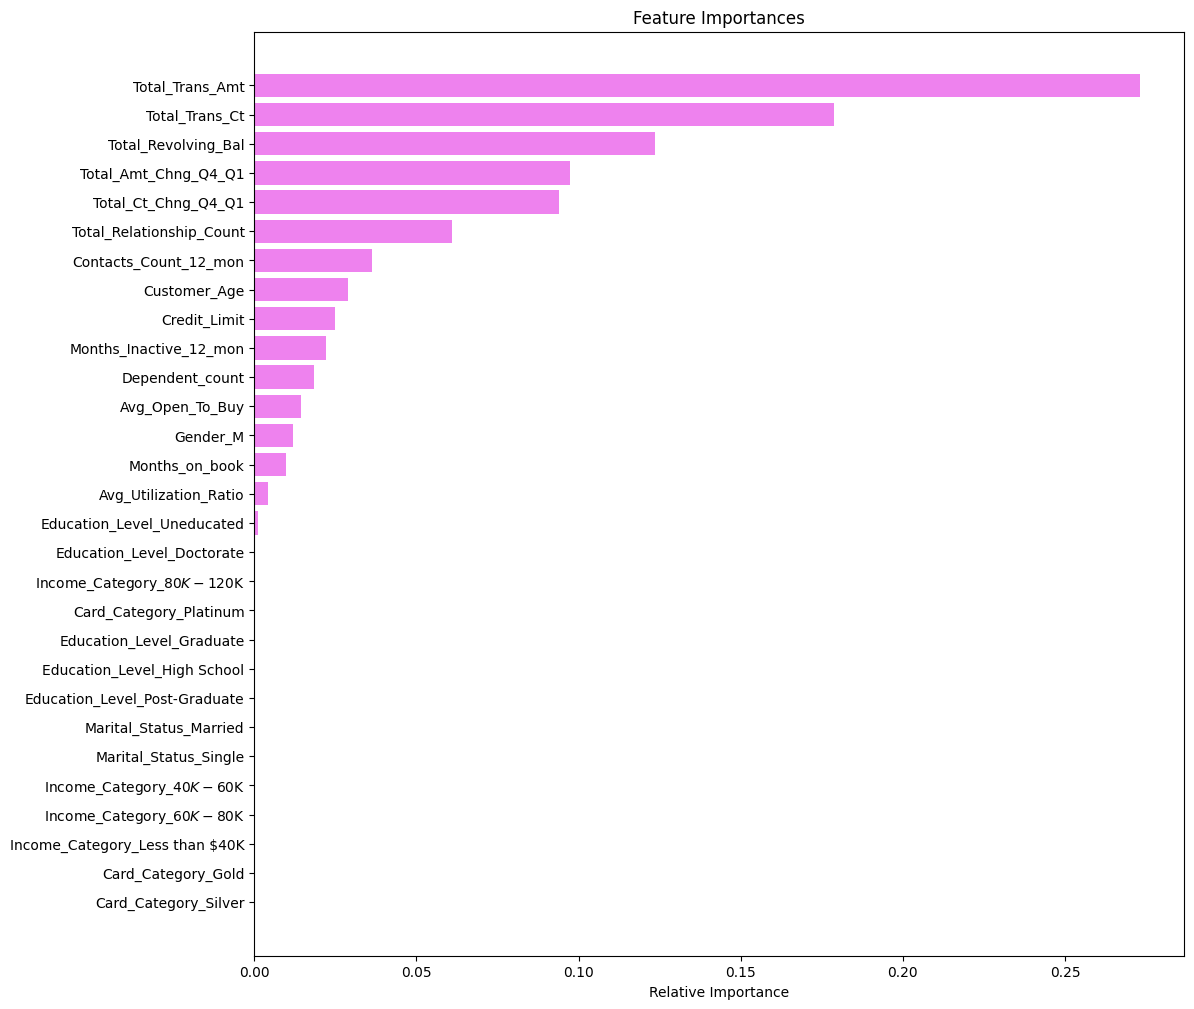

In [367]:
feature_names = X_train_un.columns
importances = tuned_adb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Below Features seems to be the most important features to focus


1.   Total_Trans_Amt - Total Transaction Amount (Last 12 months)
2.   Total_Trans_Ct - Total Transaction Count (Last 12 months)

1.   Total_Revolving_Bal - Total Revolving Balance on the Credit Card
2.   Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)

1. Total_Ct_Chng_Q4_Q1 -   Change in Transaction Count (Q4 over Q1)
2.  Contacts_Count_12_mon - No. of Contacts in the last 12 months







# Business Insights and Conclusions



*   Customers with less Transcation amount are likely to Attrite from the credit card
*   Customers who have goo transaction count in the credit card are likely to stay.


*   Customers having good revolving balance with continue existing hence focus should be on customers who have low revolving balance.
*   Customers who have Change in transaction count from q4-q1 are likely to attrite.


*   Attrition may be slightly more with Female Customers
*   The customers who have contcated 6 times in last 12 months have 100% attrition. Observation that as the customers contact in last 12 months increase, there are more probability that they opt for attrition

*   Customers who have lower Credit Limit may have more probability of attrition



















***

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



### How is the total transaction amount distributed?



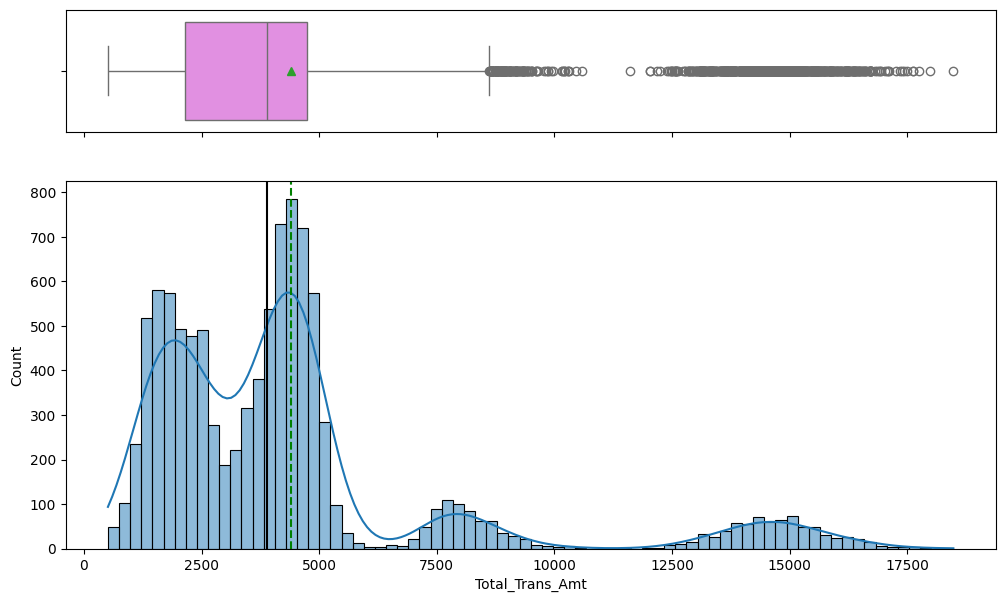

In [368]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

Total Transaction amount is right skewed. There are many high values which are outliers.

50% of data lies below 4000 . There are many customers who have 2300 and 4000$ range

### What is the distribution of the level of education of customers?

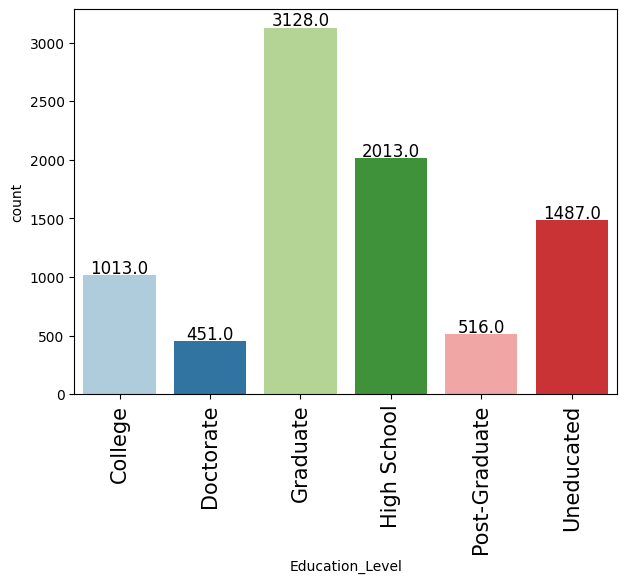

In [369]:
labeled_barplot(data, "Education_Level")

More Customers are Graduate and Very few have Doctrate / Postgraduate

### What is the distribution of the level of income of customers?

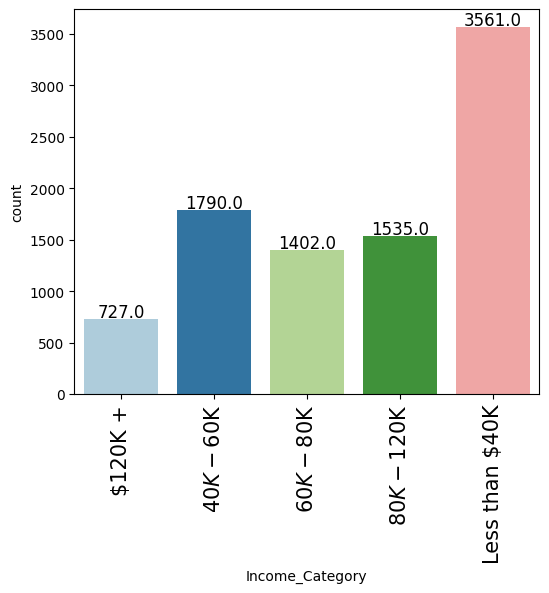

In [370]:
labeled_barplot(data, "Income_Category")

More Customers are with income less than $40K

### How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

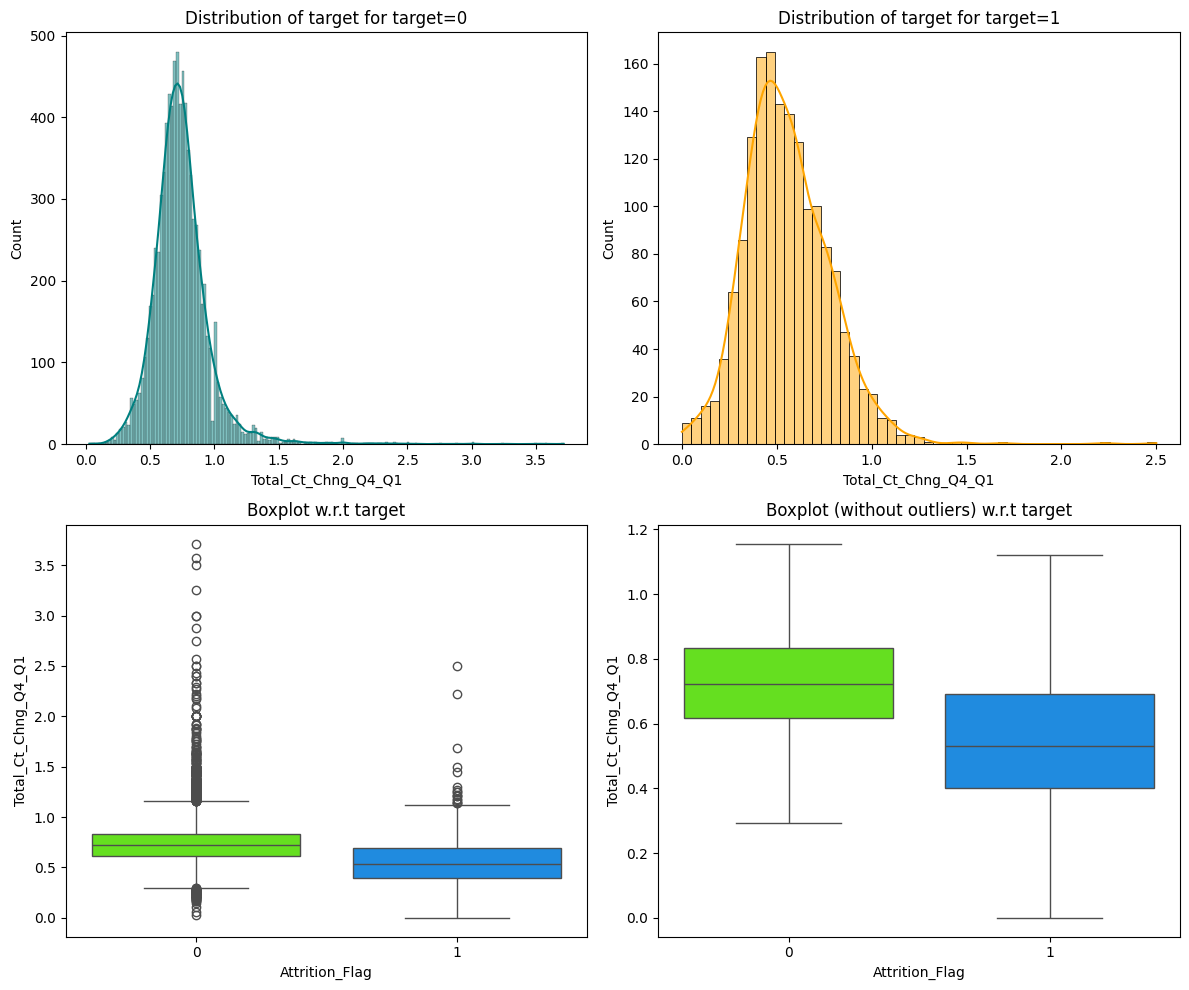

In [371]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

Customers with lower Total_Ct_Chng_Q4_Q1 Transaction Count are likely to attrite than customers ith higher Total_Ct_Chng_Q4_Q1 value

### How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

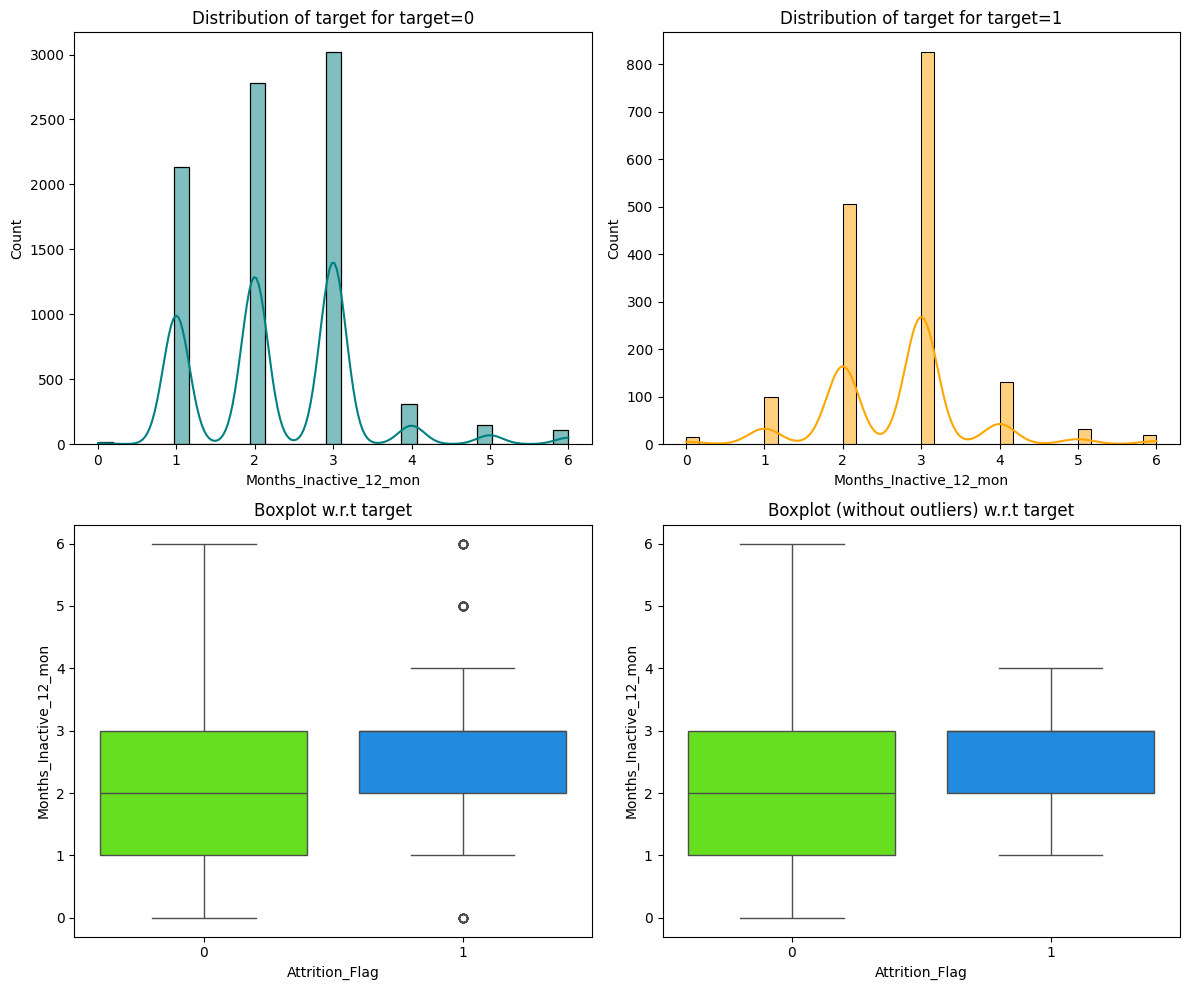

In [372]:
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Attrition_Flag")

### What are the attributes that have a strong correlation with each other?

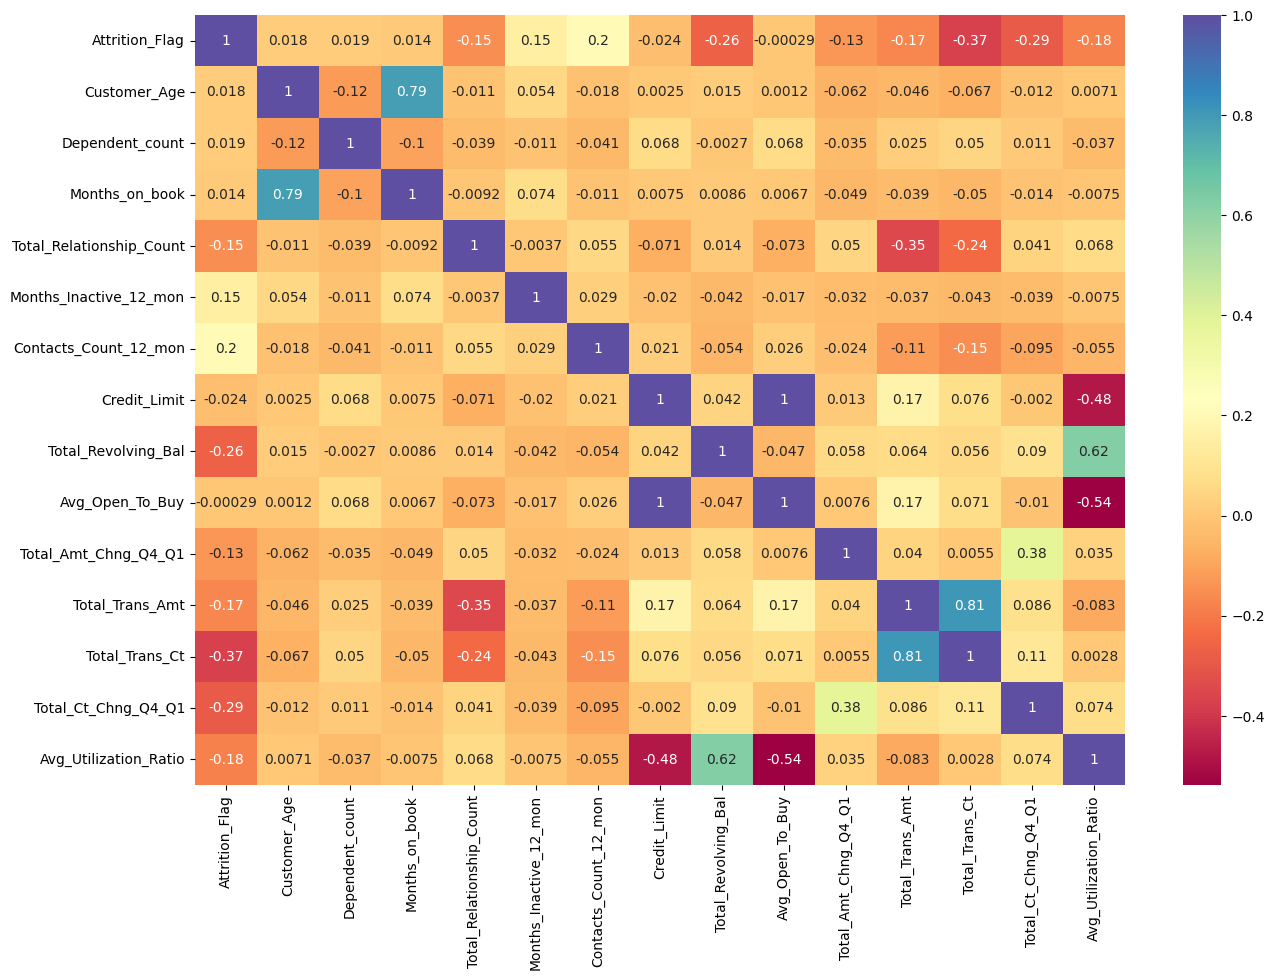

In [373]:
#plot heat map for numerical columns
num_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="Spectral")
plt.show()

Observations


*   Attrition_Flag may have negavtive correlation with Total_Revolving_Bal,Total_Trans_Ct and Total_Ct_Chng_Q4_Q1
*   Customer_Age and Months_on_book are positively correlated.

*   Total_Trans_Amt and Total_Trans_Ct have strong positive correlation
*   Total_Revolving_Bal and Avg_Utilization_Ratio have positive correlation

*   Credit_Limit and Avg_Open_To_Buy are negatively correlated to Avg_Utilization_Ratio
*   Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 are positively correlated.





